# Part 1.3 | Timeseries

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams.update({
    'font.family': 'serif',              # Set the font family
    'font.serif': ['Times New Roman'],   # Use a specific serif font
    'font.size': 16,                     # Set the general font size
    'axes.titlesize': 20,                # Set the font size of the title
    'axes.labelsize': 16,                # Set the font size of axis labels
    'font.style': 'italic',              # Set the font style to italic
    'figure.dpi': 400   
})

category_color_pal = sns.color_palette("hls", 8)#sns.color_palette("husl", 8)
continuous_color_pal = sns.color_palette("rocket_r", as_cmap=True)

## Data

In [2]:
data = pd.read_csv('data/Coffee_Prices.csv')
data = data.rename(columns={' value': 'price'})

data['date'] = pd.to_datetime(data['date'], format='%m/%d/%y')
data['date'] = data['date'].dt.to_period('M')

monthly_avg = data.groupby('date')['price'].mean().reset_index()
monthly_avg['month'] = monthly_avg['date'].dt.to_timestamp().dt.month_name()
monthly_avg['year'] = monthly_avg['date'].dt.to_timestamp().dt.year
monthly_avg.to_csv('data/Monthly_Coffee_Prices.csv')

In [3]:
data = pd.read_csv('data/Coffee_Prices.csv')
data = data.rename(columns={' value': 'price'})

data.to_csv('data/Daily_Coffee_Prices.csv')

## CPI Data

In [4]:
cpi = pd.read_csv('data/CPI_raw.csv')

cpi.Year = cpi.Year.astype(int)
cpi = cpi[cpi.Year >= 1970]
cpi['I'] = cpi['Annual Percent Change (rate of inflation)'].str.replace('%', '').astype(float)/100
cpi['cpi'] = cpi['Annual Average CPI(-U)'].astype(float)

""" 1970's Dollar """

# To find out how much a price in Year 1 would be in Year 2 dollars:
# Year 2 Price = Year 1 Price x (Year 2 CPI/Year 1 CPI)

price_base = 1
values = []
i_base = cpi['cpi'].values[0]
for i in cpi['cpi'].values:
    price = price_base * (i/i_base)
    values.append(price)
cpi['base'] = values

""" Today's Dollar """

# To find out how much a price in Year 1 would be in Year 2 dollars:
# Year 2 Price = Year 1 Price x (Year 2 CPI/Year 1 CPI)

price_base = 1
values = []
i_base = cpi['cpi'].values[-1]
for i in cpi['cpi'].values:
    price = price_base * (i/i_base)
    values.append(price)
cpi['today'] = values

cpi.to_csv('data/CPI.csv')

In [5]:
data = pd.read_csv('data/Daily_Coffee_Prices.csv', index_col=0)
data['date_column'] = pd.to_datetime(data['date'], format='%m/%d/%y')
data['year'] = data['date_column'].dt.year
data = data[(data['year'] < 2023)]

cpi = pd.read_csv('data/CPI.csv')

today_list = []
cpi_list = []
for i,row in data.iterrows():
    cpi_year = cpi[cpi.Year == row.year]
    year = row.year
    today_list.append(cpi_year.today.iloc[0])
    cpi_list.append(cpi_year.cpi.iloc[0])
    
data['today'] = today_list
data['cpi'] = cpi_list
data.to_csv('data/Coffee_Prices_CPI.csv')

## Concept

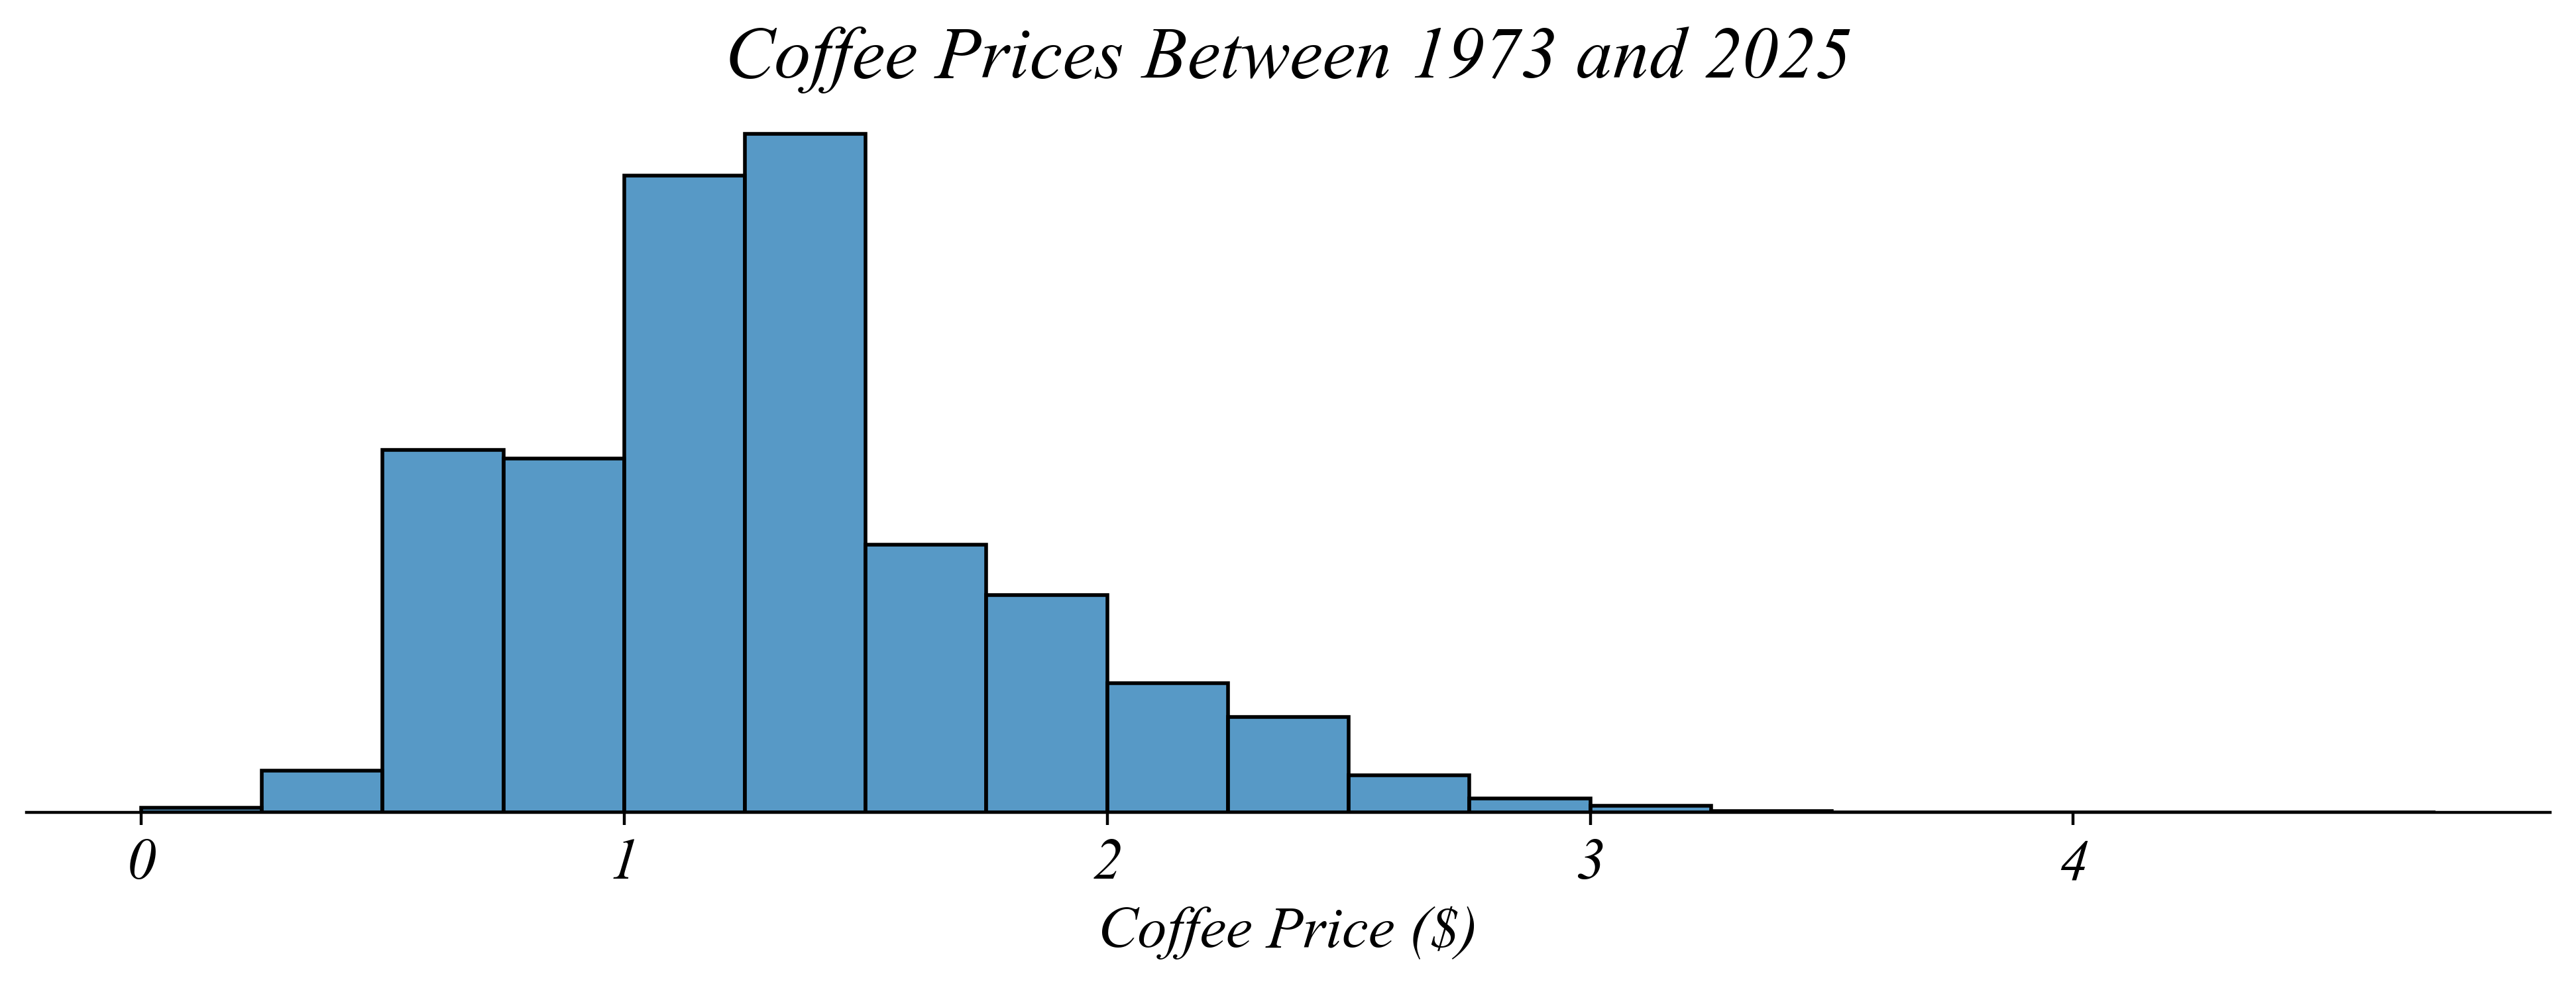

In [6]:
# Load Dataset
data = pd.read_csv('data/Daily_Coffee_Prices.csv', index_col=0)

# Figure
plt.figure(figsize=(10, 4))
sns.histplot(data, x='price', bins=np.arange(0,20,1)/4)

# Styling
plt.title('Coffee Prices Between 1973 and 2025')
plt.xlabel('Coffee Price ($)')
plt.ylabel('')

plt.yticks([])
sns.despine(left=True, right=True, top=True)
plt.grid(False)
plt.tight_layout()

# Save Figure
plt.savefig('i/i_01.png')

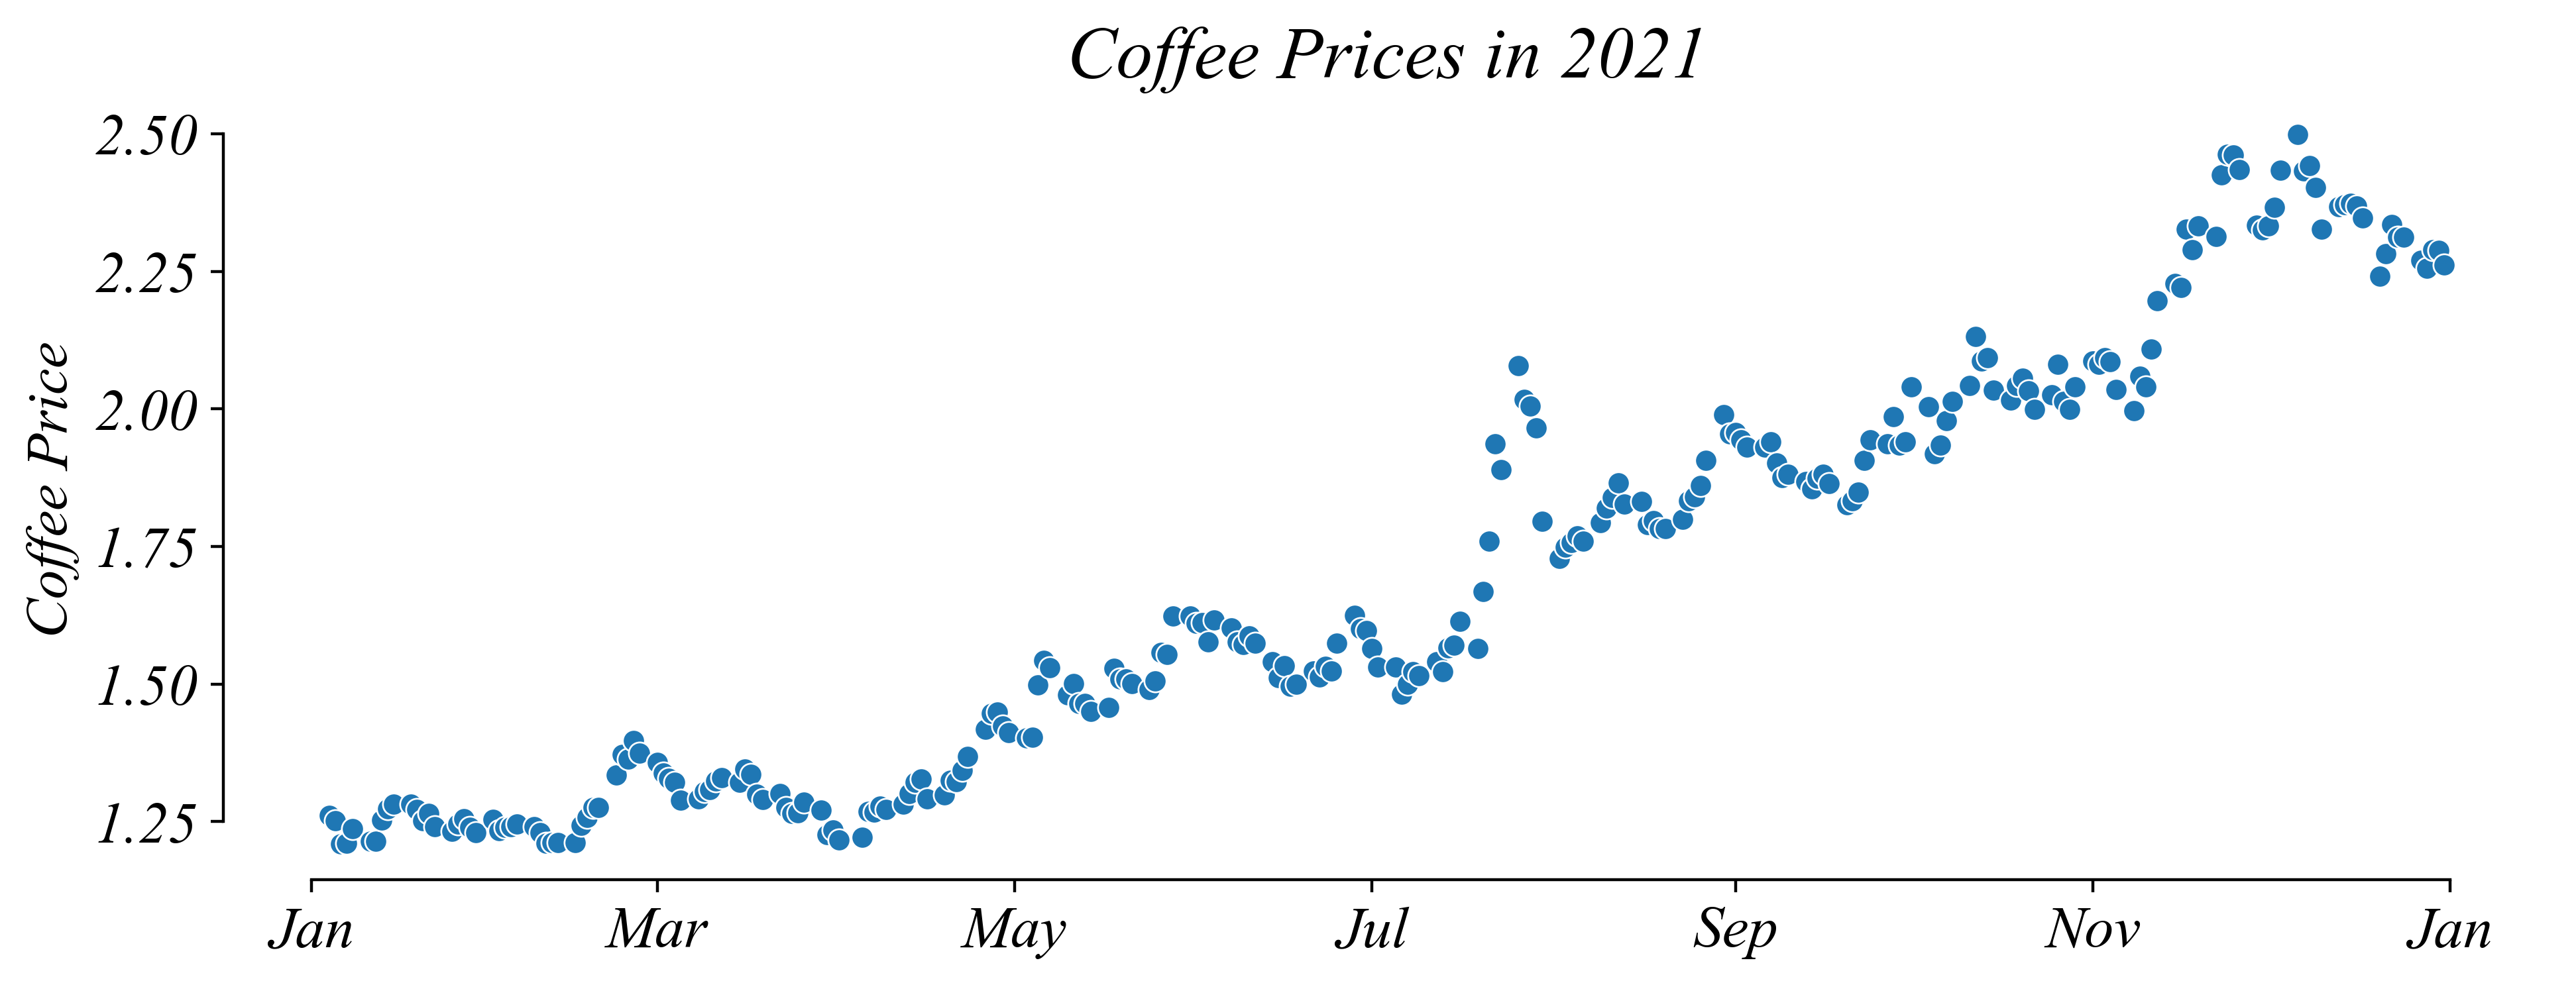

In [7]:
import matplotlib.dates as mdates
# Load Dataset
data = pd.read_csv('data/Daily_Coffee_Prices.csv', index_col=0)
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%y')
data = data[data['date'].dt.year == 2021]

# Figure
plt.figure(figsize=(10, 4))
sns.scatterplot(data, x='date', y='price')

# Stlying
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b')) # "Jan", "Feb", etc.

plt.xlabel('')
plt.ylabel('Coffee Price')
plt.title('Coffee Prices in 2021')
sns.despine(trim=True)
plt.tight_layout()

# Save Figure
plt.savefig('i/i_02.png')

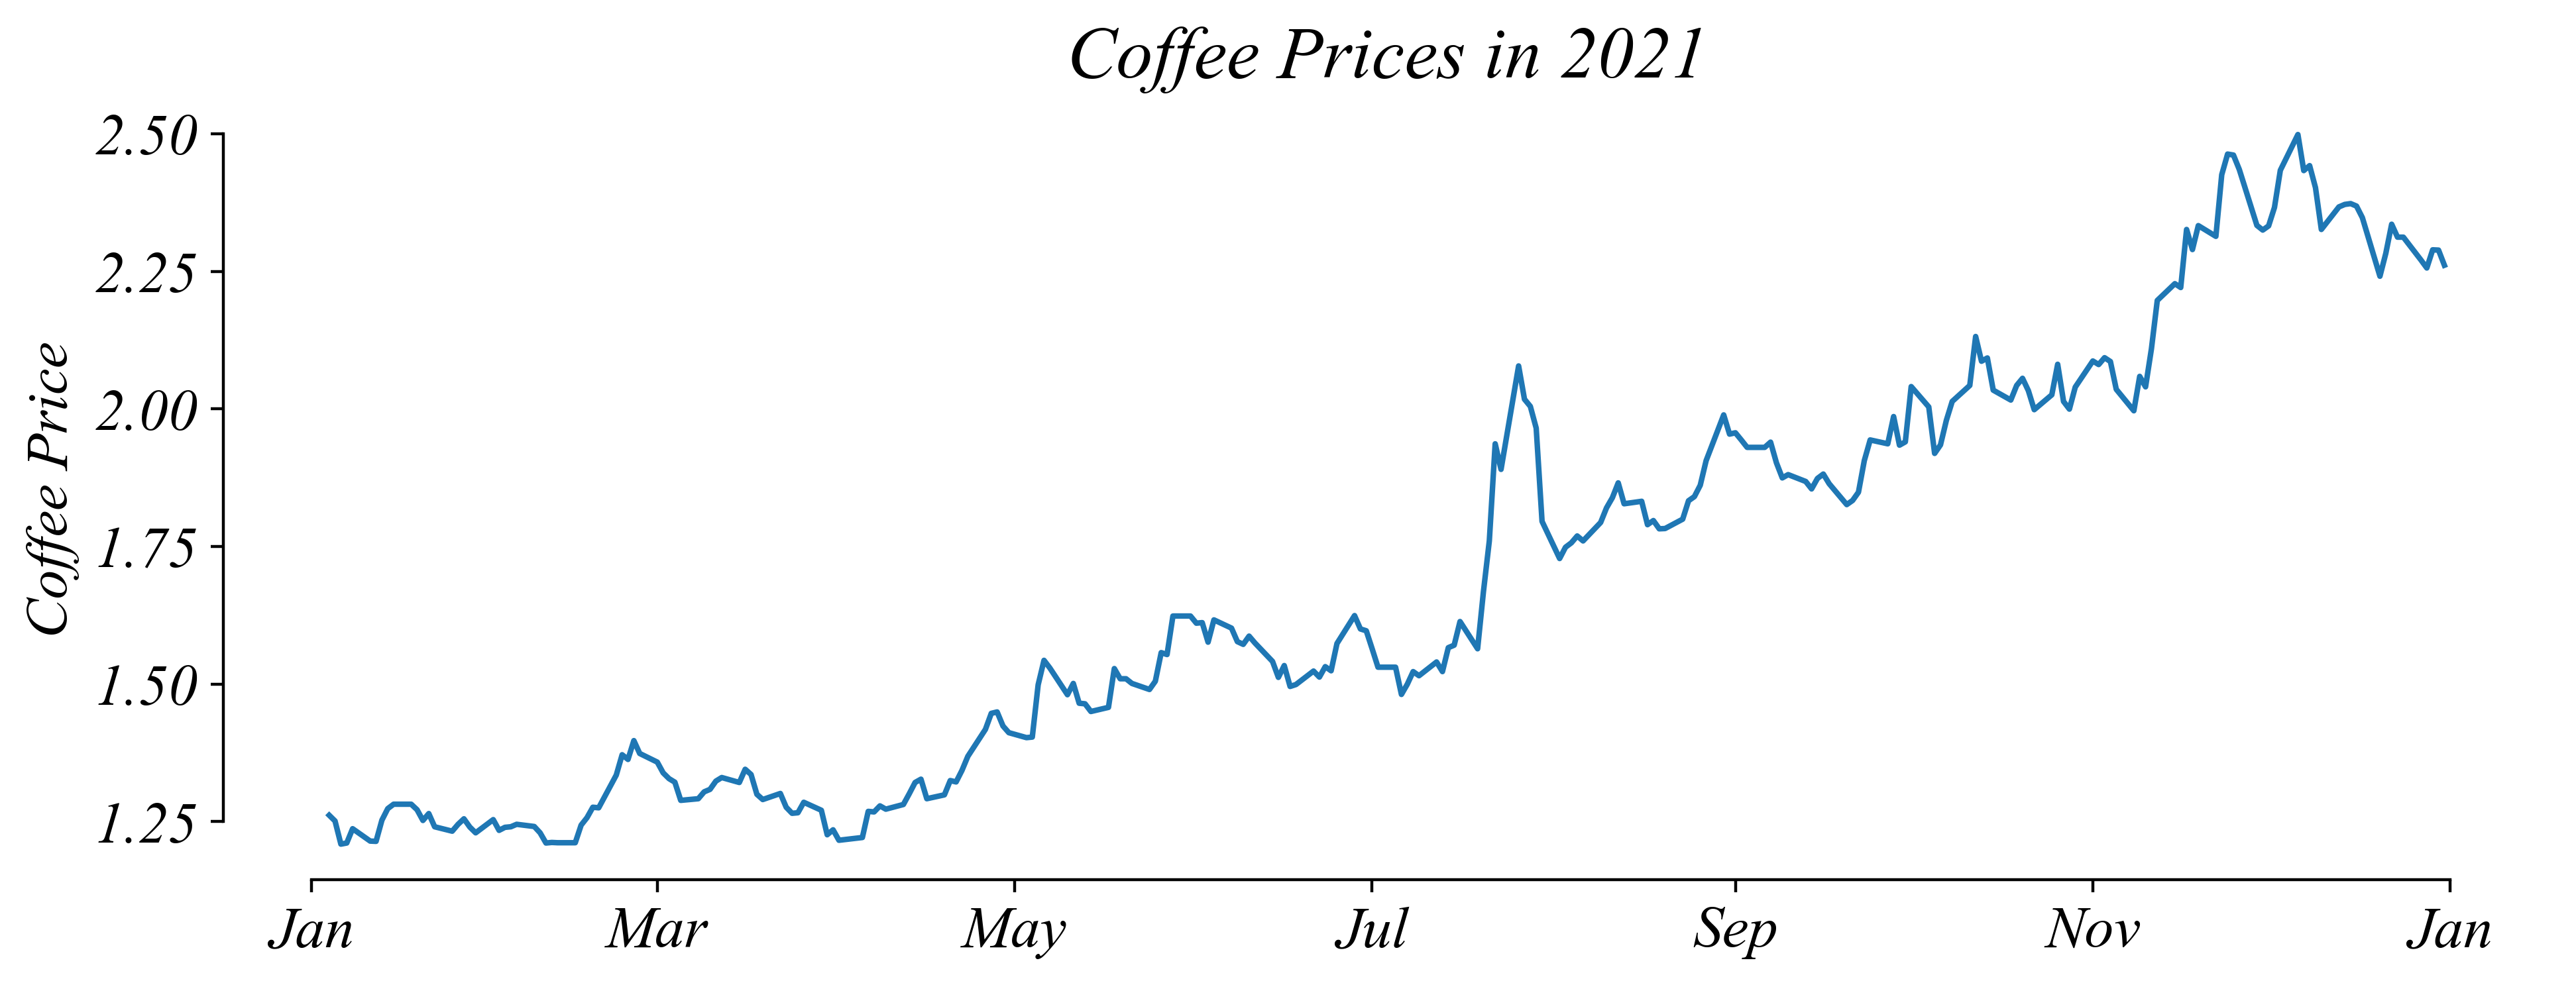

In [8]:
import matplotlib.dates as mdates
# Load Dataset
data = pd.read_csv('data/Daily_Coffee_Prices.csv', index_col=0)
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%y')
data = data[data['date'].dt.year == 2021]

# Figure
plt.figure(figsize=(10, 4))
sns.lineplot(data, x='date', y='price')

# Stlying
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b')) # "Jan", "Feb", etc.

plt.xlabel('')
plt.ylabel('Coffee Price')
plt.title('Coffee Prices in 2021')
sns.despine(trim=True)
plt.tight_layout()

# Save Figure
plt.savefig('i/i_03.png')

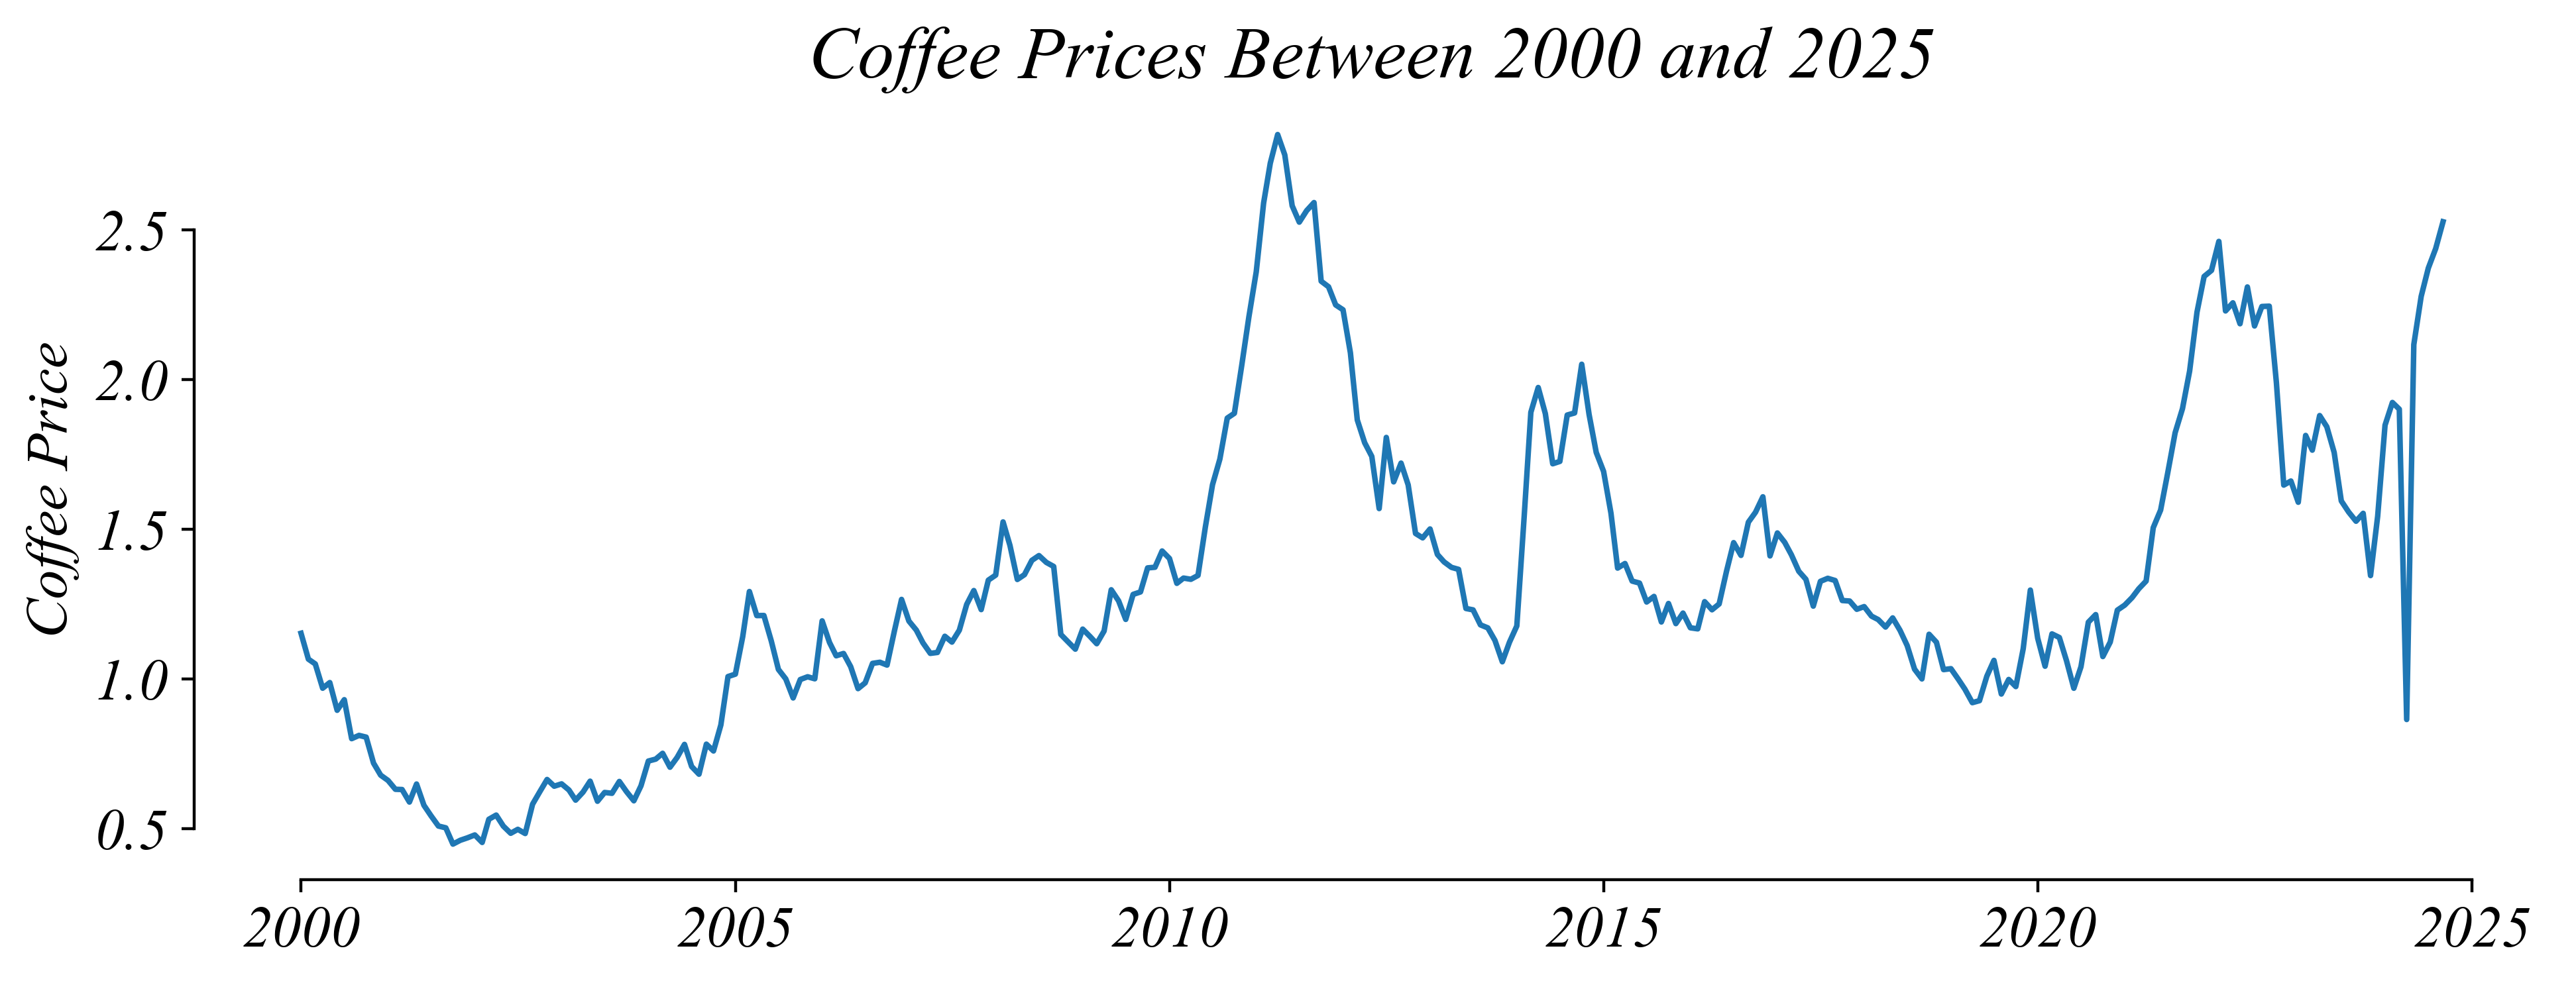

In [9]:
import matplotlib.dates as mdates

# Load Dataset
data = pd.read_csv('data/Monthly_Coffee_Prices.csv', index_col=0)
data['date'] = pd.to_datetime(data['date'], format='%Y-%m')
data = data[data['date'].dt.year >= 2000]

# Figure
plt.figure(figsize=(10, 4))
sns.lineplot(data, x='date', y='price')

# Specify Years
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
years_to_show = [2000, 2005, 2010, 2015, 2020, 2025]
tick_dates = pd.to_datetime([f'{year}-01-01' for year in years_to_show])
ax.set_xticks(tick_dates)
ax.set_xticklabels(years_to_show)  # Just show the year number

# Stlying
plt.xlabel('')
plt.ylabel('Coffee Price')
plt.title('Coffee Prices Between 2000 and 2025')
sns.despine(trim=True)
plt.tight_layout()

# Save Figure
plt.savefig('i/i_04.png')

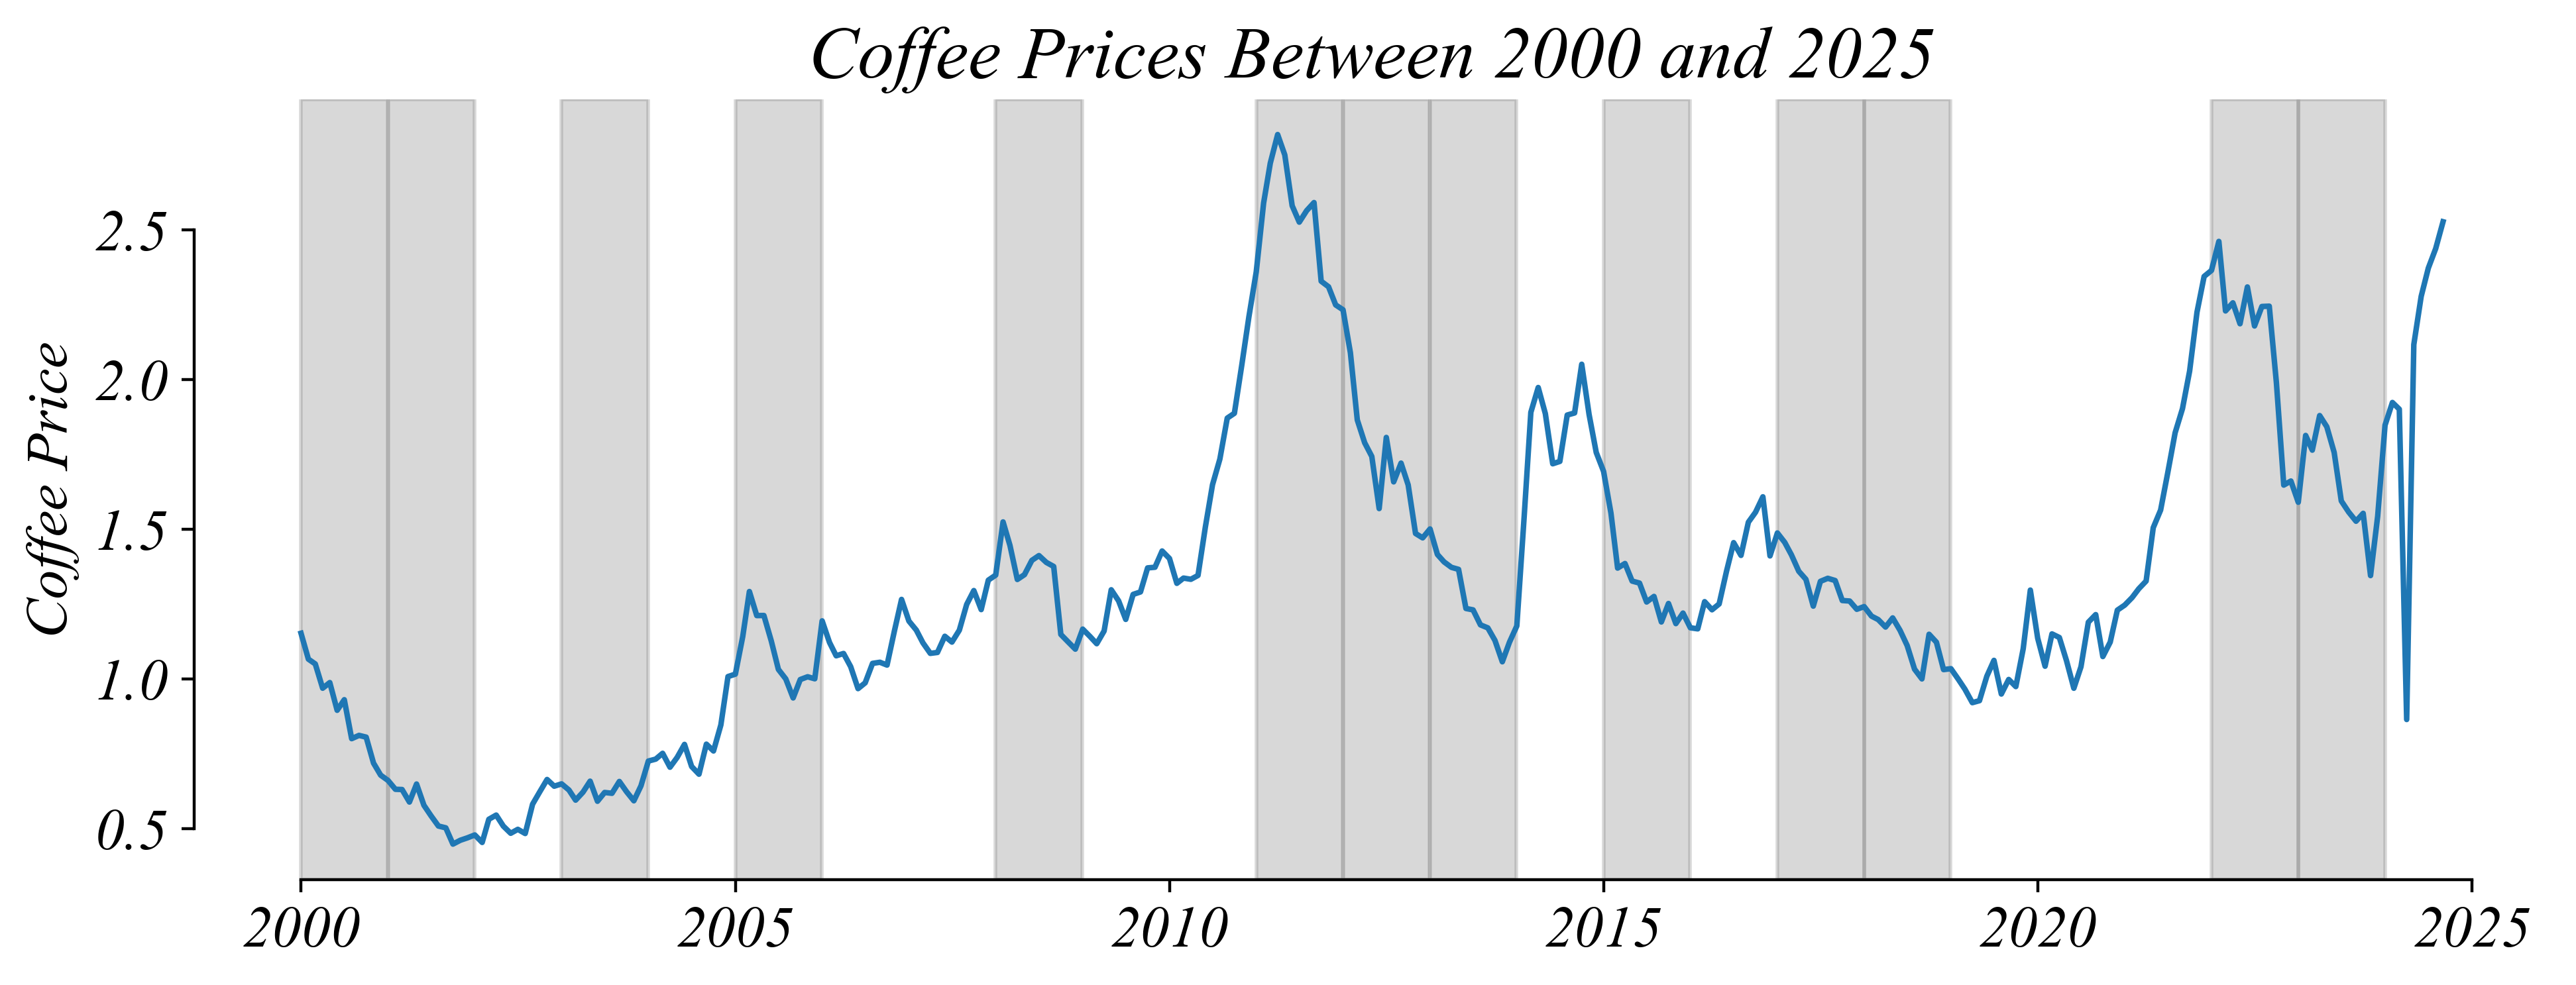

In [11]:
import matplotlib.dates as mdates

# Load Dataset
data = pd.read_csv('data/Monthly_Coffee_Prices.csv', index_col=0)
data['date'] = pd.to_datetime(data['date'], format='%Y-%m')
data = data[data['date'].dt.year >= 2000]

# Figure
plt.figure(figsize=(10, 4))
sns.lineplot(data, x='date', y='price')

# Calculate yearly changes
data_indexed = data.set_index('date')
yearly_data = data_indexed.resample('YE').agg({'price': ['first', 'last']})
yearly_data.columns = ['first_value', 'last_value']
yearly_data['change'] = yearly_data['last_value'] - yearly_data['first_value']

# Add grey regions
ax = plt.gca()
for year in yearly_data[yearly_data['change'] < 0].index:
    start = year.replace(month=1, day=1)
    end = year.replace(month=12, day=31)
    ax.axvspan(start, end, color='grey', alpha=0.3, label='Price Decline' if year == yearly_data[yearly_data['change'] < 0].index[0] else '')

# Specify Years
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%YE'))
years_to_show = [2000, 2005, 2010, 2015, 2020, 2025]
tick_dates = pd.to_datetime([f'{year}-01-01' for year in years_to_show])
ax.set_xticks(tick_dates)
ax.set_xticklabels(years_to_show)  # Just show the year number

# Stlying
plt.xlabel('')
plt.ylabel('Coffee Price')
plt.title('Coffee Prices Between 2000 and 2025')
sns.despine(trim=True)
plt.tight_layout()

# Save Figure
plt.savefig('i/i_05.png')

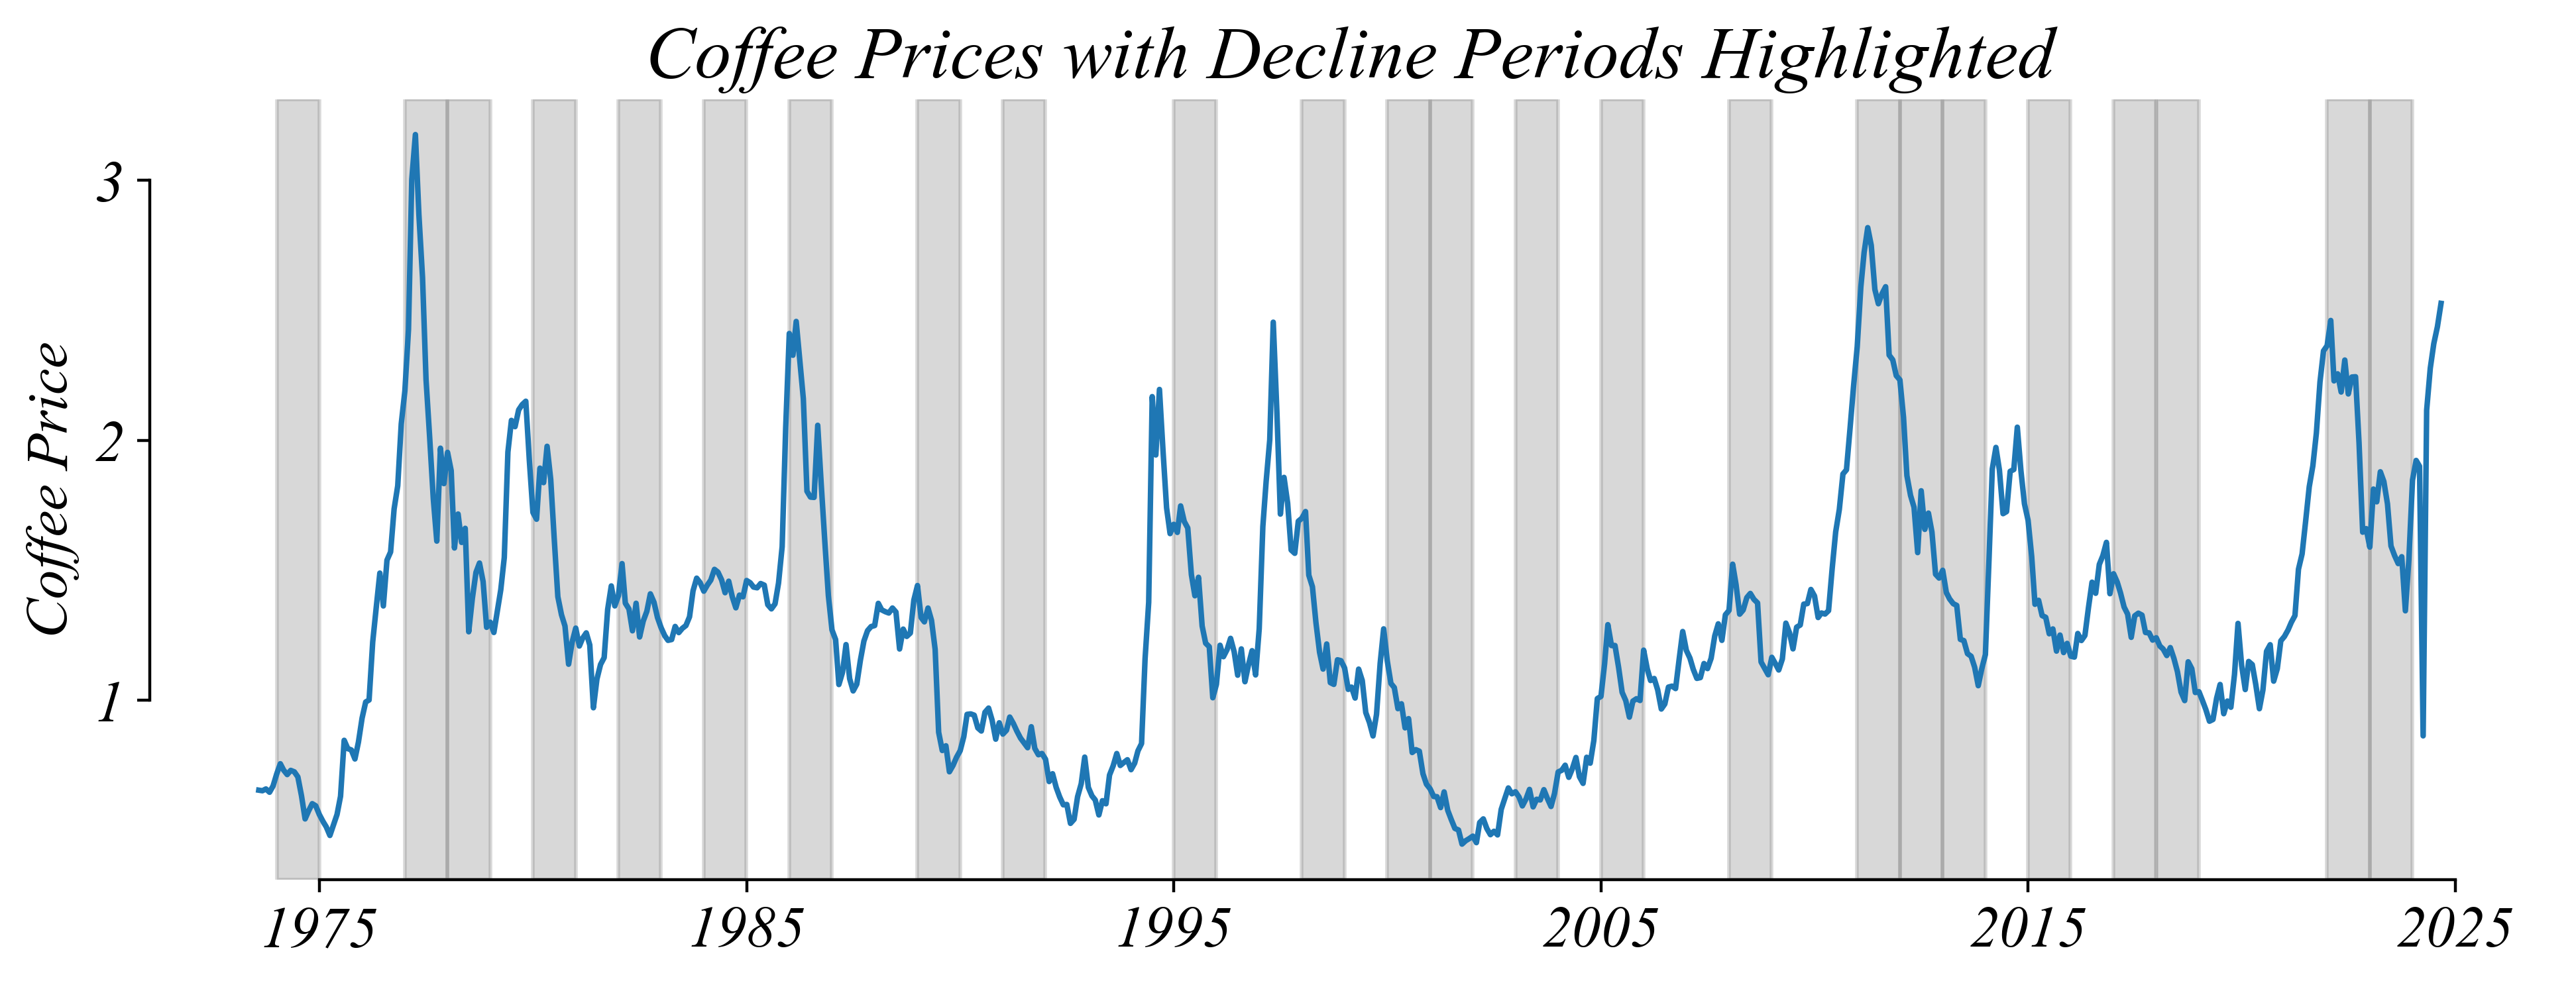

In [12]:
import matplotlib.dates as mdates

# Load Dataset
data = pd.read_csv('data/Monthly_Coffee_Prices.csv', index_col=0)
data['date'] = pd.to_datetime(data['date'], format='%Y-%m')

# Calculate yearly changes
data_indexed = data.set_index('date')
yearly_data = data_indexed.resample('YE').agg({'price': ['first', 'last']})
yearly_data.columns = ['first_value', 'last_value']
yearly_data['change'] = yearly_data['last_value'] - yearly_data['first_value']

# Figure
plt.figure(figsize=(10, 4))
sns.lineplot(data=data, x='date', y='price')

# Add grey regions
ax = plt.gca()
for year in yearly_data[yearly_data['change'] < 0].index:
    start = year.replace(month=1, day=1)
    end = year.replace(month=12, day=31)
    ax.axvspan(start, end, color='grey', alpha=0.3, label='Price Decline' if year == yearly_data[yearly_data['change'] < 0].index[0] else '')

# Specify Years
years_to_show = [1975, 1985, 1995, 2005, 2015, 2025]
tick_dates = pd.to_datetime([f'{year}-01-01' for year in years_to_show])
ax.set_xticks(tick_dates)
ax.set_xticklabels(years_to_show)

# Styling
plt.xlabel('')
plt.ylabel('Coffee Price')
plt.title('Coffee Prices with Decline Periods Highlighted')
sns.despine(trim=True)
plt.tight_layout()

# Save Figure
plt.savefig('i/i_06.png')

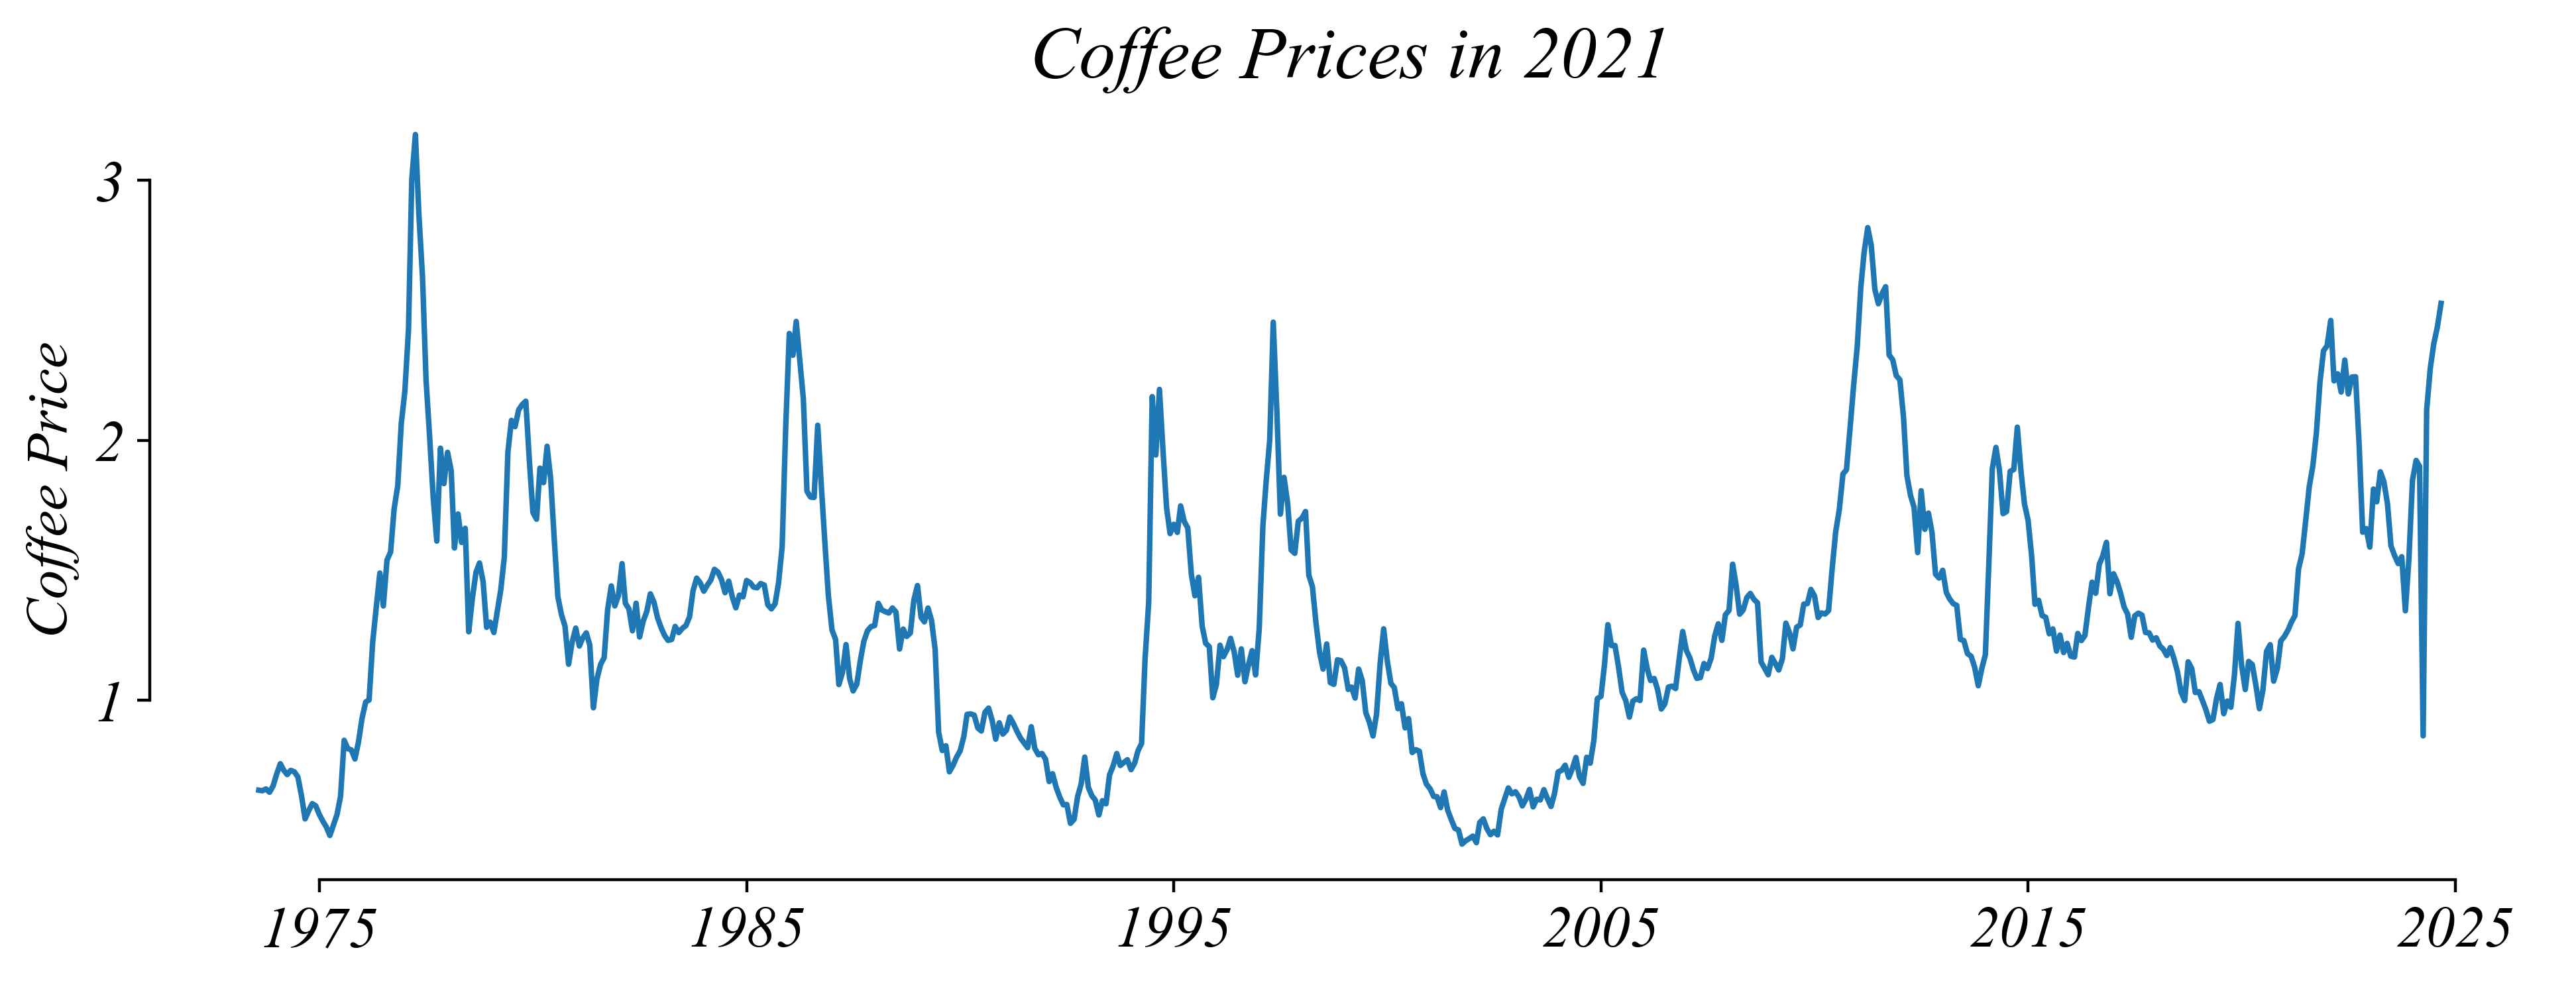

In [13]:
import matplotlib.dates as mdates

# Load Dataset
data = pd.read_csv('data/Monthly_Coffee_Prices.csv', index_col=0)
data['date'] = pd.to_datetime(data['date'], format='%Y-%m')

# Figure
plt.figure(figsize=(10, 4))
sns.lineplot(data, x='date', y='price')

# Specify Years
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
years_to_show = [1975, 1985, 1995, 2005, 2015, 2025]
tick_dates = pd.to_datetime([f'{year}-01-01' for year in years_to_show])
ax.set_xticks(tick_dates)
ax.set_xticklabels(years_to_show)  # Just show the year number

# Stlying
plt.xlabel('')
plt.ylabel('Coffee Price')
plt.title('Coffee Prices in 2021')
sns.despine(trim=True)
plt.tight_layout()

# Save Figure
plt.savefig('i/i_07.png')

## Inflation Preview

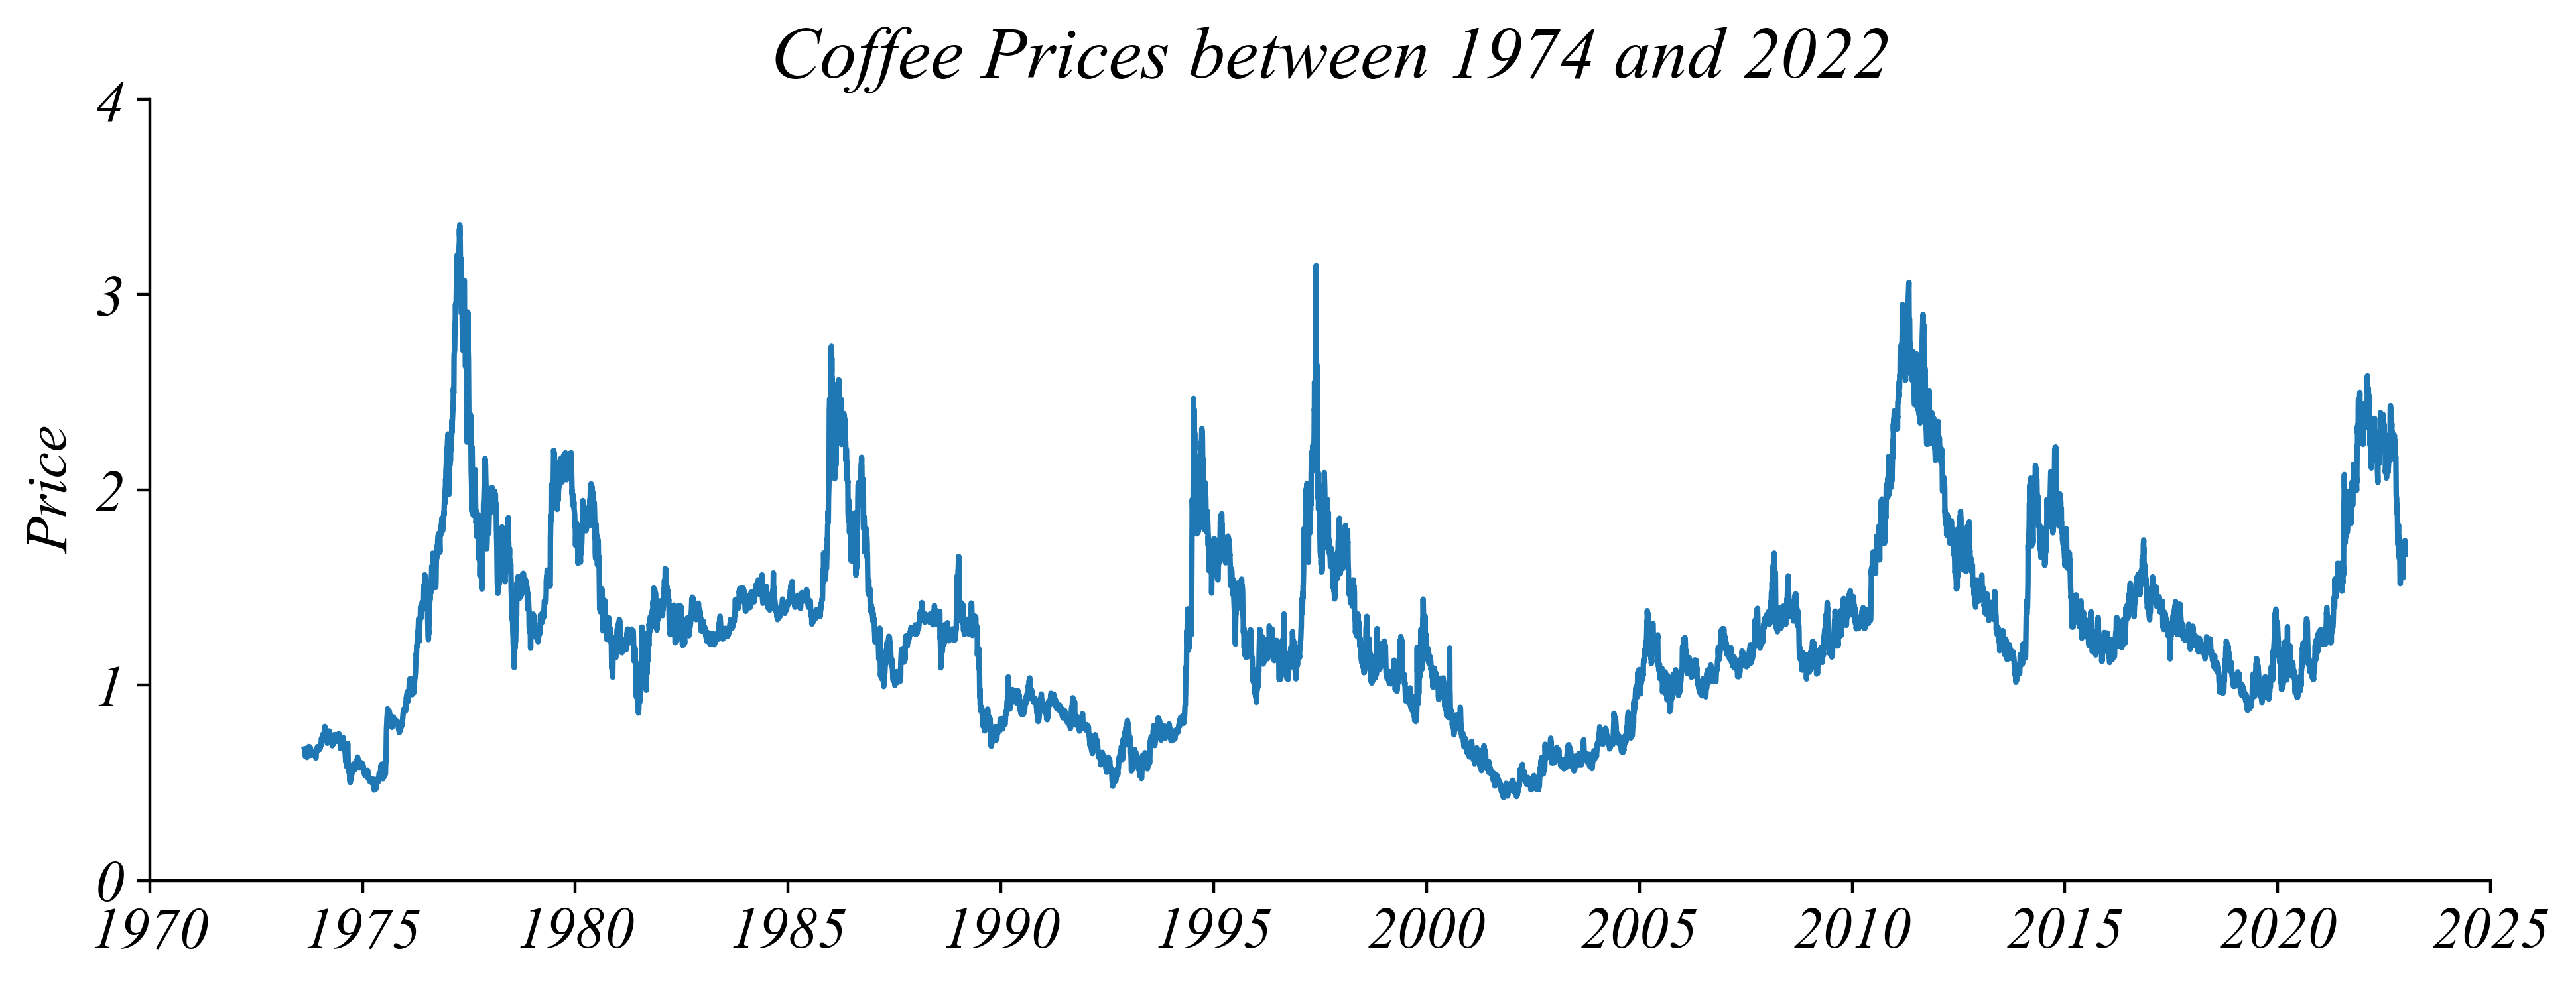

In [14]:
import matplotlib.dates as mdates

# Load Dataset
data = pd.read_csv('data/Daily_Coffee_Prices.csv', index_col=0)
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%y')
data = data[(data['date'].dt.year < 2023)]

# Figure
plt.figure(figsize=(10, 4))
sns.lineplot(data, x='date', y='price')

# Styling
plt.title('Coffee Prices between 1974 and 2022')
plt.xlabel('')
plt.ylabel('Price')
plt.yticks(np.arange(0,4+1,1))

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
years_to_show = range(1970,2030,5)
tick_dates = pd.to_datetime([f'{year}-01-01' for year in years_to_show])
ax.set_xticks(tick_dates)
ax.set_xticklabels(years_to_show)

sns.despine(trim=True)
plt.tight_layout()

# Save Figure
plt.savefig('i/i_cpi_01.png')

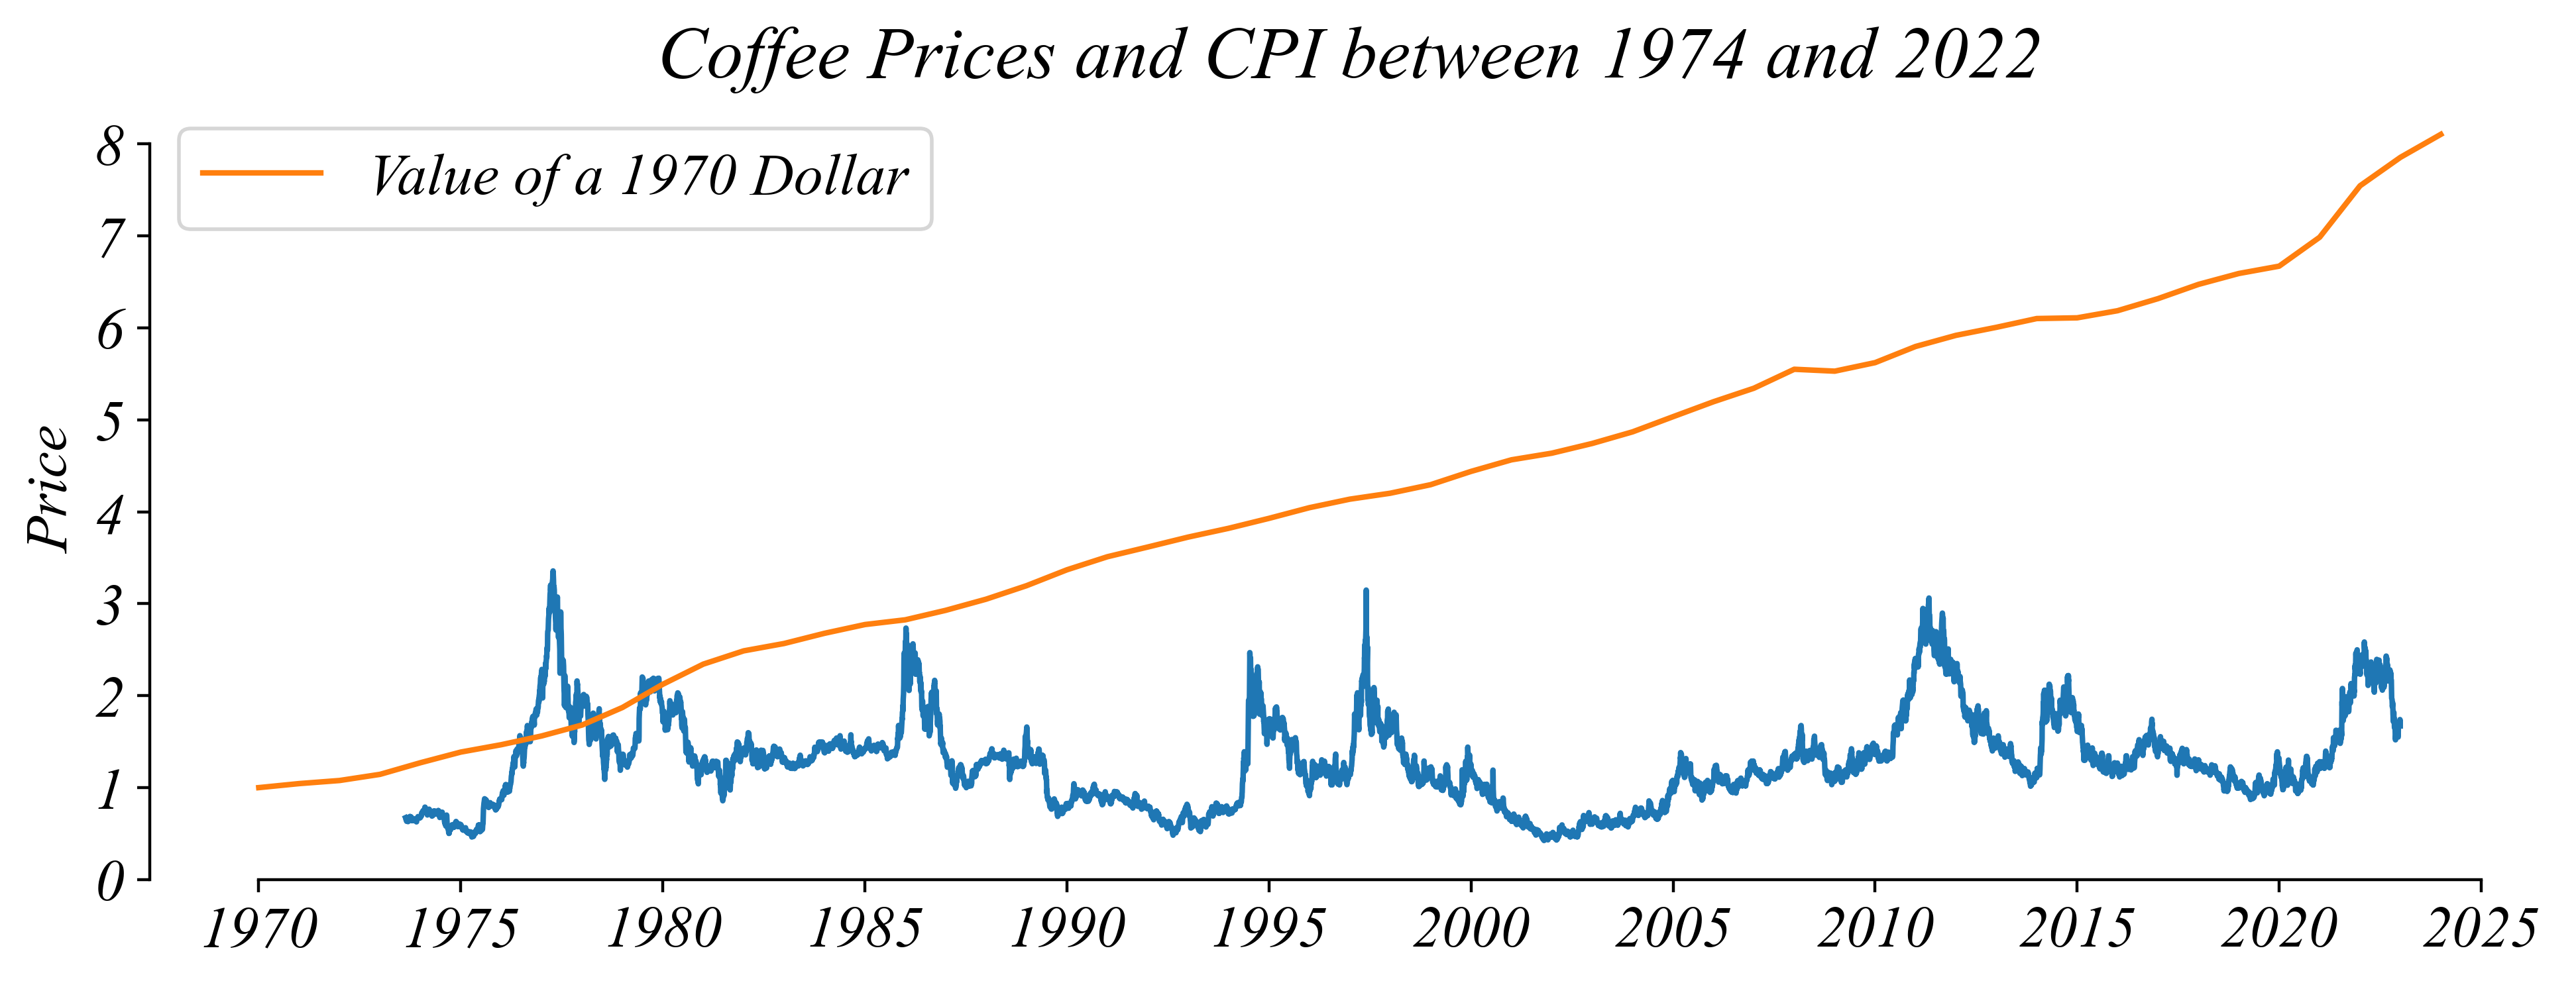

In [15]:
import matplotlib.dates as mdates

# Load Dataset
data = pd.read_csv('data/Daily_Coffee_Prices.csv', index_col=0)
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%y')
data = data[(data['date'].dt.year < 2023)]

cpi = pd.read_csv('data/CPI.csv')
cpi['date'] = pd.to_datetime(cpi['Year'], format='%Y')

# Figure
plt.figure(figsize=(10, 4))
sns.lineplot(data, x='date', y='price')
sns.lineplot(cpi, x='date', y='base', label='Value of a 1970 Dollar')

# Styling
plt.title('Coffee Prices and CPI between 1974 and 2022')
plt.xlabel('')
plt.ylabel('Price')
plt.yticks(np.arange(0,8+1,1))

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
years_to_show = range(1970,2030,5)
tick_dates = pd.to_datetime([f'{year}-01-01' for year in years_to_show])
ax.set_xticks(tick_dates)
ax.set_xticklabels(years_to_show)

sns.despine(trim=True)
plt.tight_layout()
plt.legend()

# Save Figure
plt.savefig('i/i_cpi_02.png')

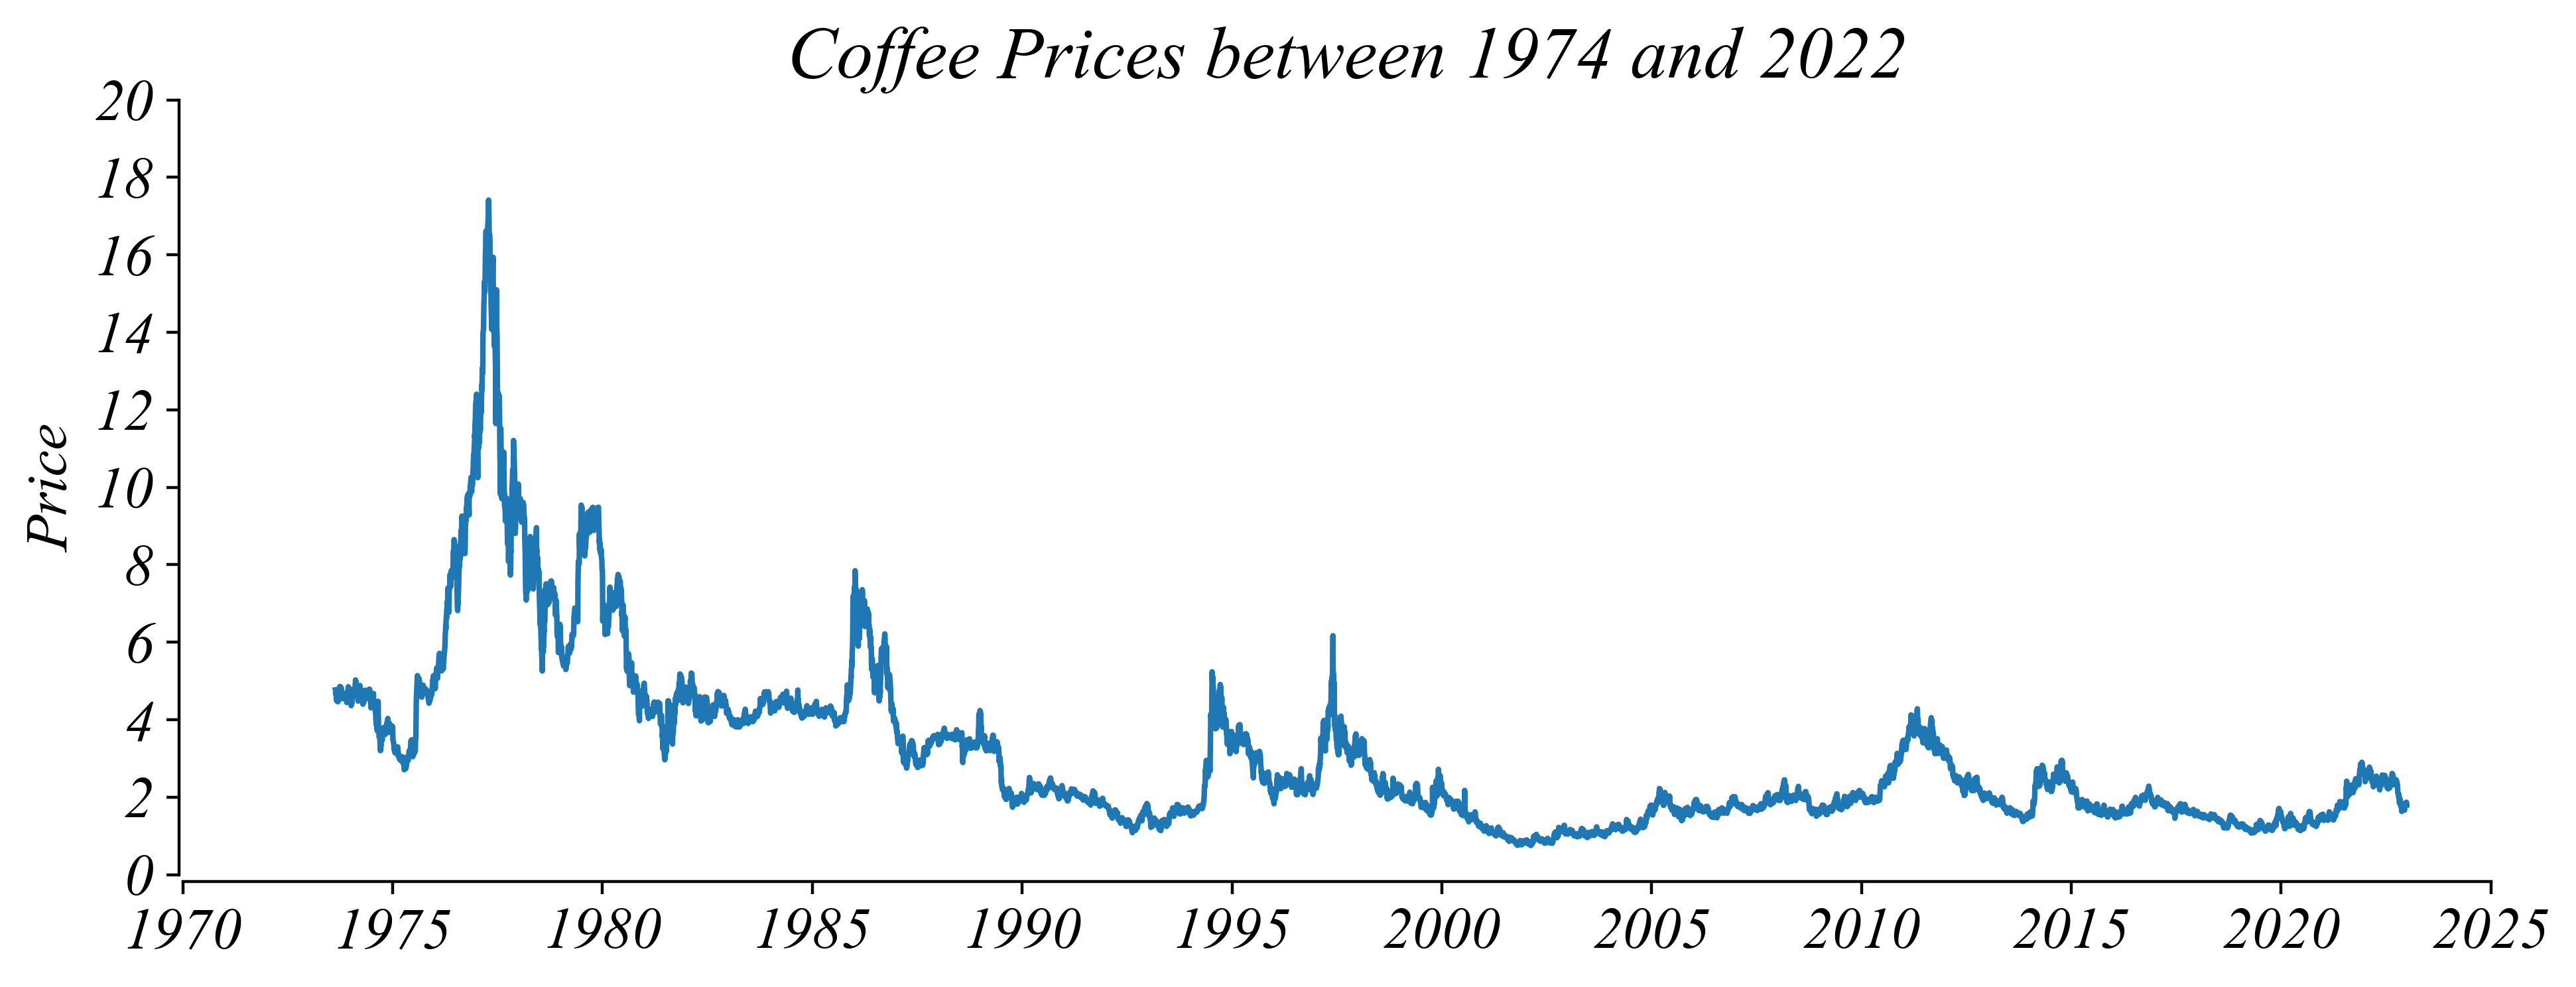

In [16]:
import matplotlib.dates as mdates

# Load Dataset
data = pd.read_csv('data/Coffee_Prices_CPI.csv')
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%y')
data['adjusted_price'] = data['price'] / data['today']

# Figure
plt.figure(figsize=(10, 4))
sns.lineplot(data, x='date', y='adjusted_price')

# Styling
plt.title('Coffee Prices between 1974 and 2022')
plt.xlabel('')
plt.ylabel('Price')
plt.yticks(np.arange(0,20+1,2))

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
years_to_show = range(1970,2030,5)
tick_dates = pd.to_datetime([f'{year}-01-01' for year in years_to_show])
ax.set_xticks(tick_dates)
ax.set_xticklabels(years_to_show)

sns.despine(trim=True, offset=True)
plt.tight_layout()

# Save Figure
plt.savefig('i/i_cpi_03.png')

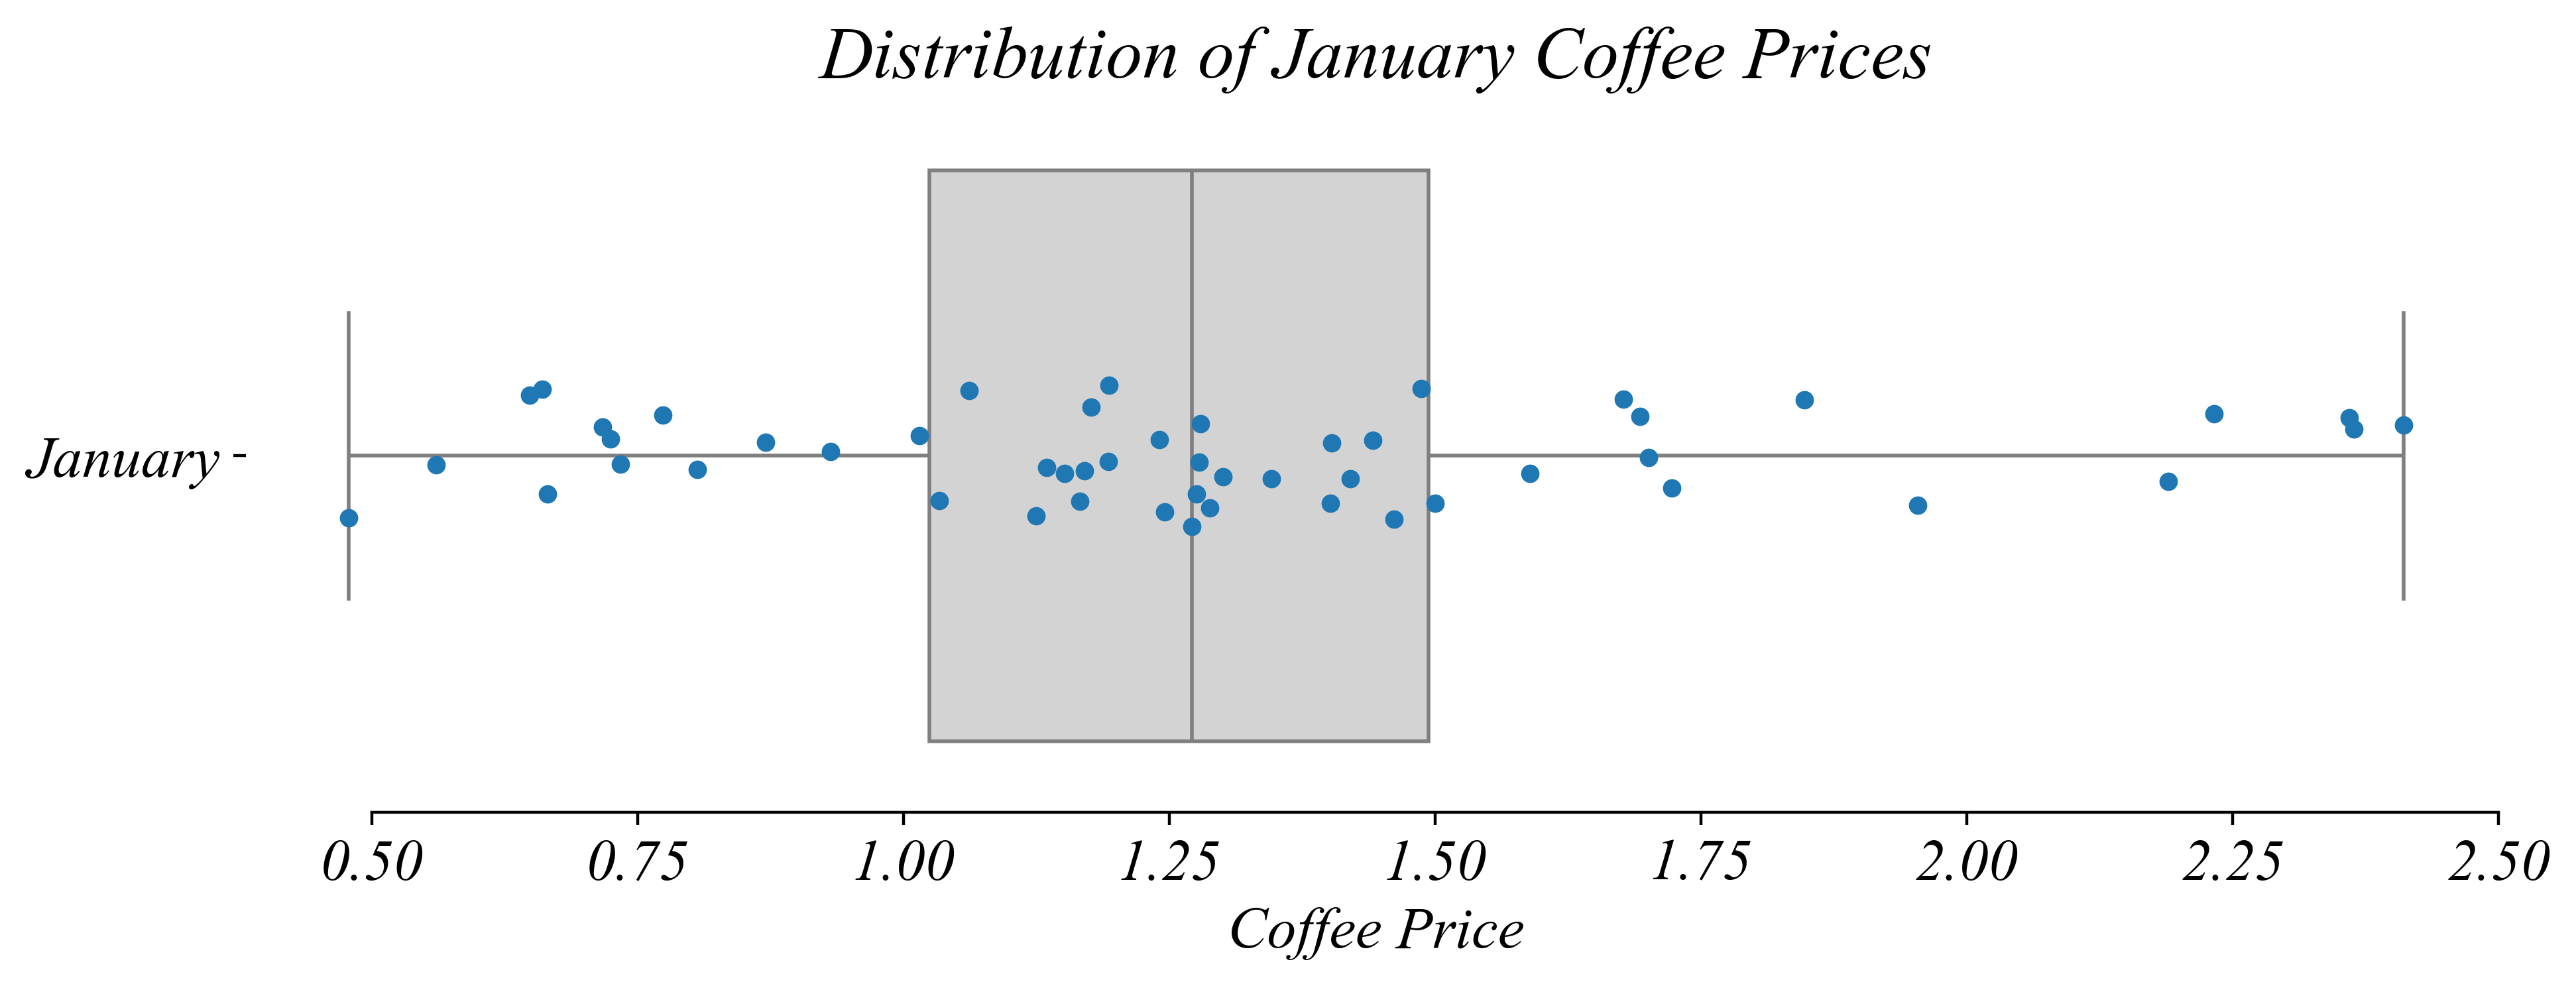

In [17]:
# Load Dataset
data = pd.read_csv('data/Monthly_Coffee_Prices.csv', index_col=0)
data['date'] = pd.to_datetime(data['date'], format='%Y-%m')

# Filter for January only
january_data = data[data['date'].dt.month == 1]

# Figure
plt.figure(figsize=(10, 4))

# Create horizontal boxplot with seaborn
sns.boxplot(january_data, x='price', color='lightgrey', whis=(0, 100))
sns.stripplot(january_data, x='price')

# Styling
plt.xlabel('Coffee Price')
plt.ylabel('')
plt.yticks([0], ['January'])
plt.title('Distribution of January Coffee Prices')
sns.despine(trim=True)
plt.tight_layout()

# Save Figure
plt.savefig('i/i_08.png')

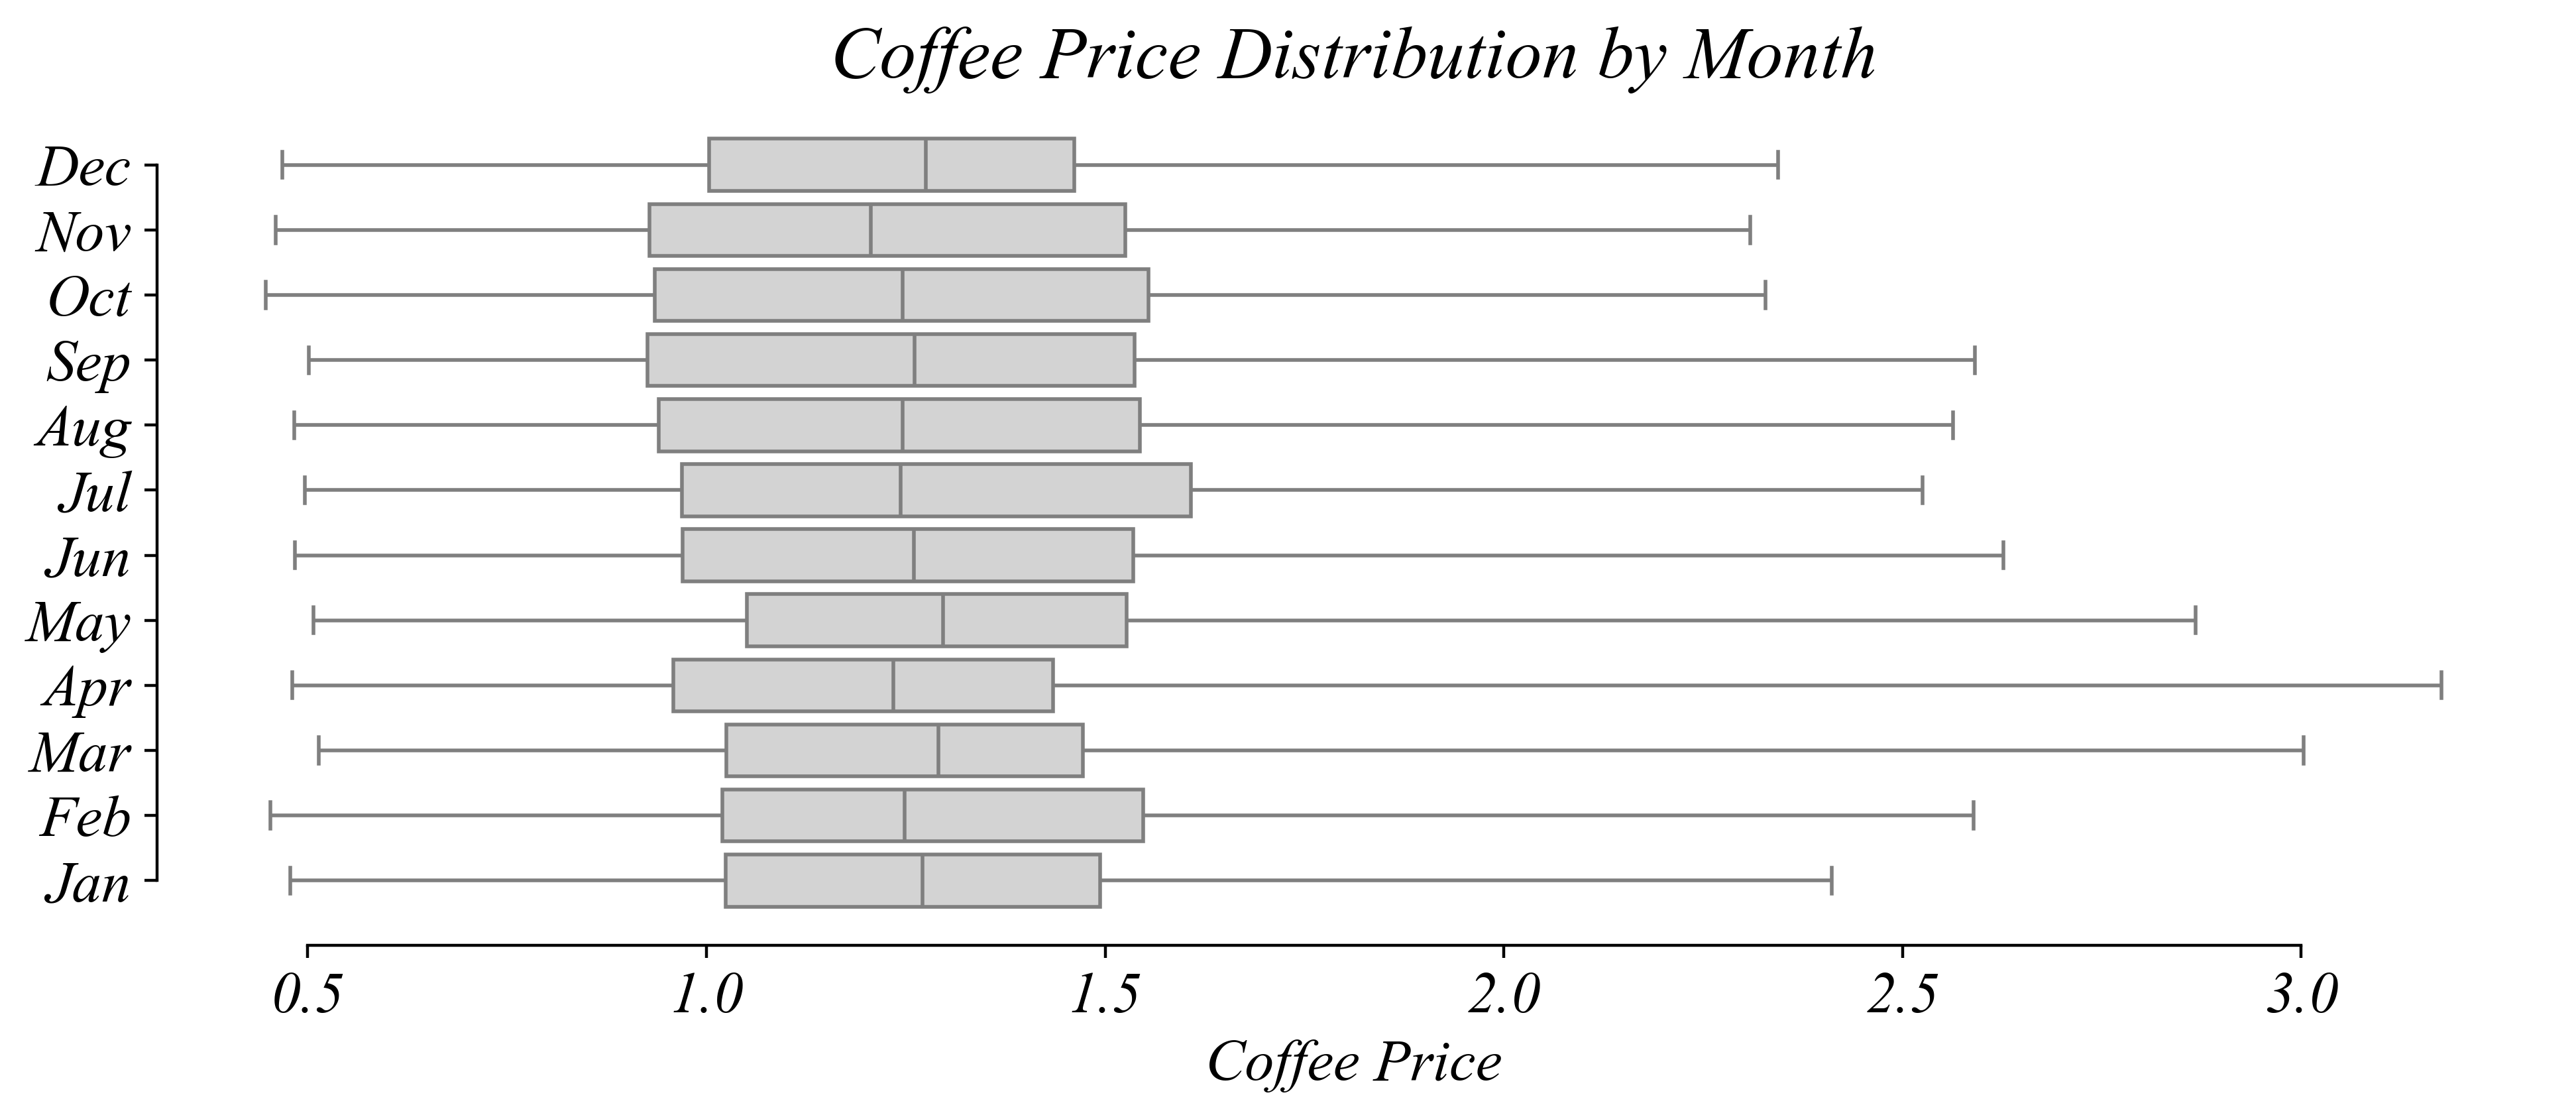

In [18]:
# Load Dataset
data = pd.read_csv('data/Monthly_Coffee_Prices.csv', index_col=0)
data['date'] = pd.to_datetime(data['date'], format='%Y-%m')

# Add month names
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_names = dict(zip(range(1, 13), months))
data['month_name'] = data['date'].dt.month.map(month_names)

# Figure
plt.figure(figsize=(10, 4.5))
sns.boxplot(data, x='price', y='month_name', 
            order=months, color='lightgrey', whis=(0, 100))

# Styling
plt.xlabel('Coffee Price')
plt.ylabel('')
plt.title('Coffee Price Distribution by Month')
sns.despine(trim=True)
plt.tight_layout()

plt.ylim(-1,12)

# Save Figure
plt.savefig('i/i_09.png')

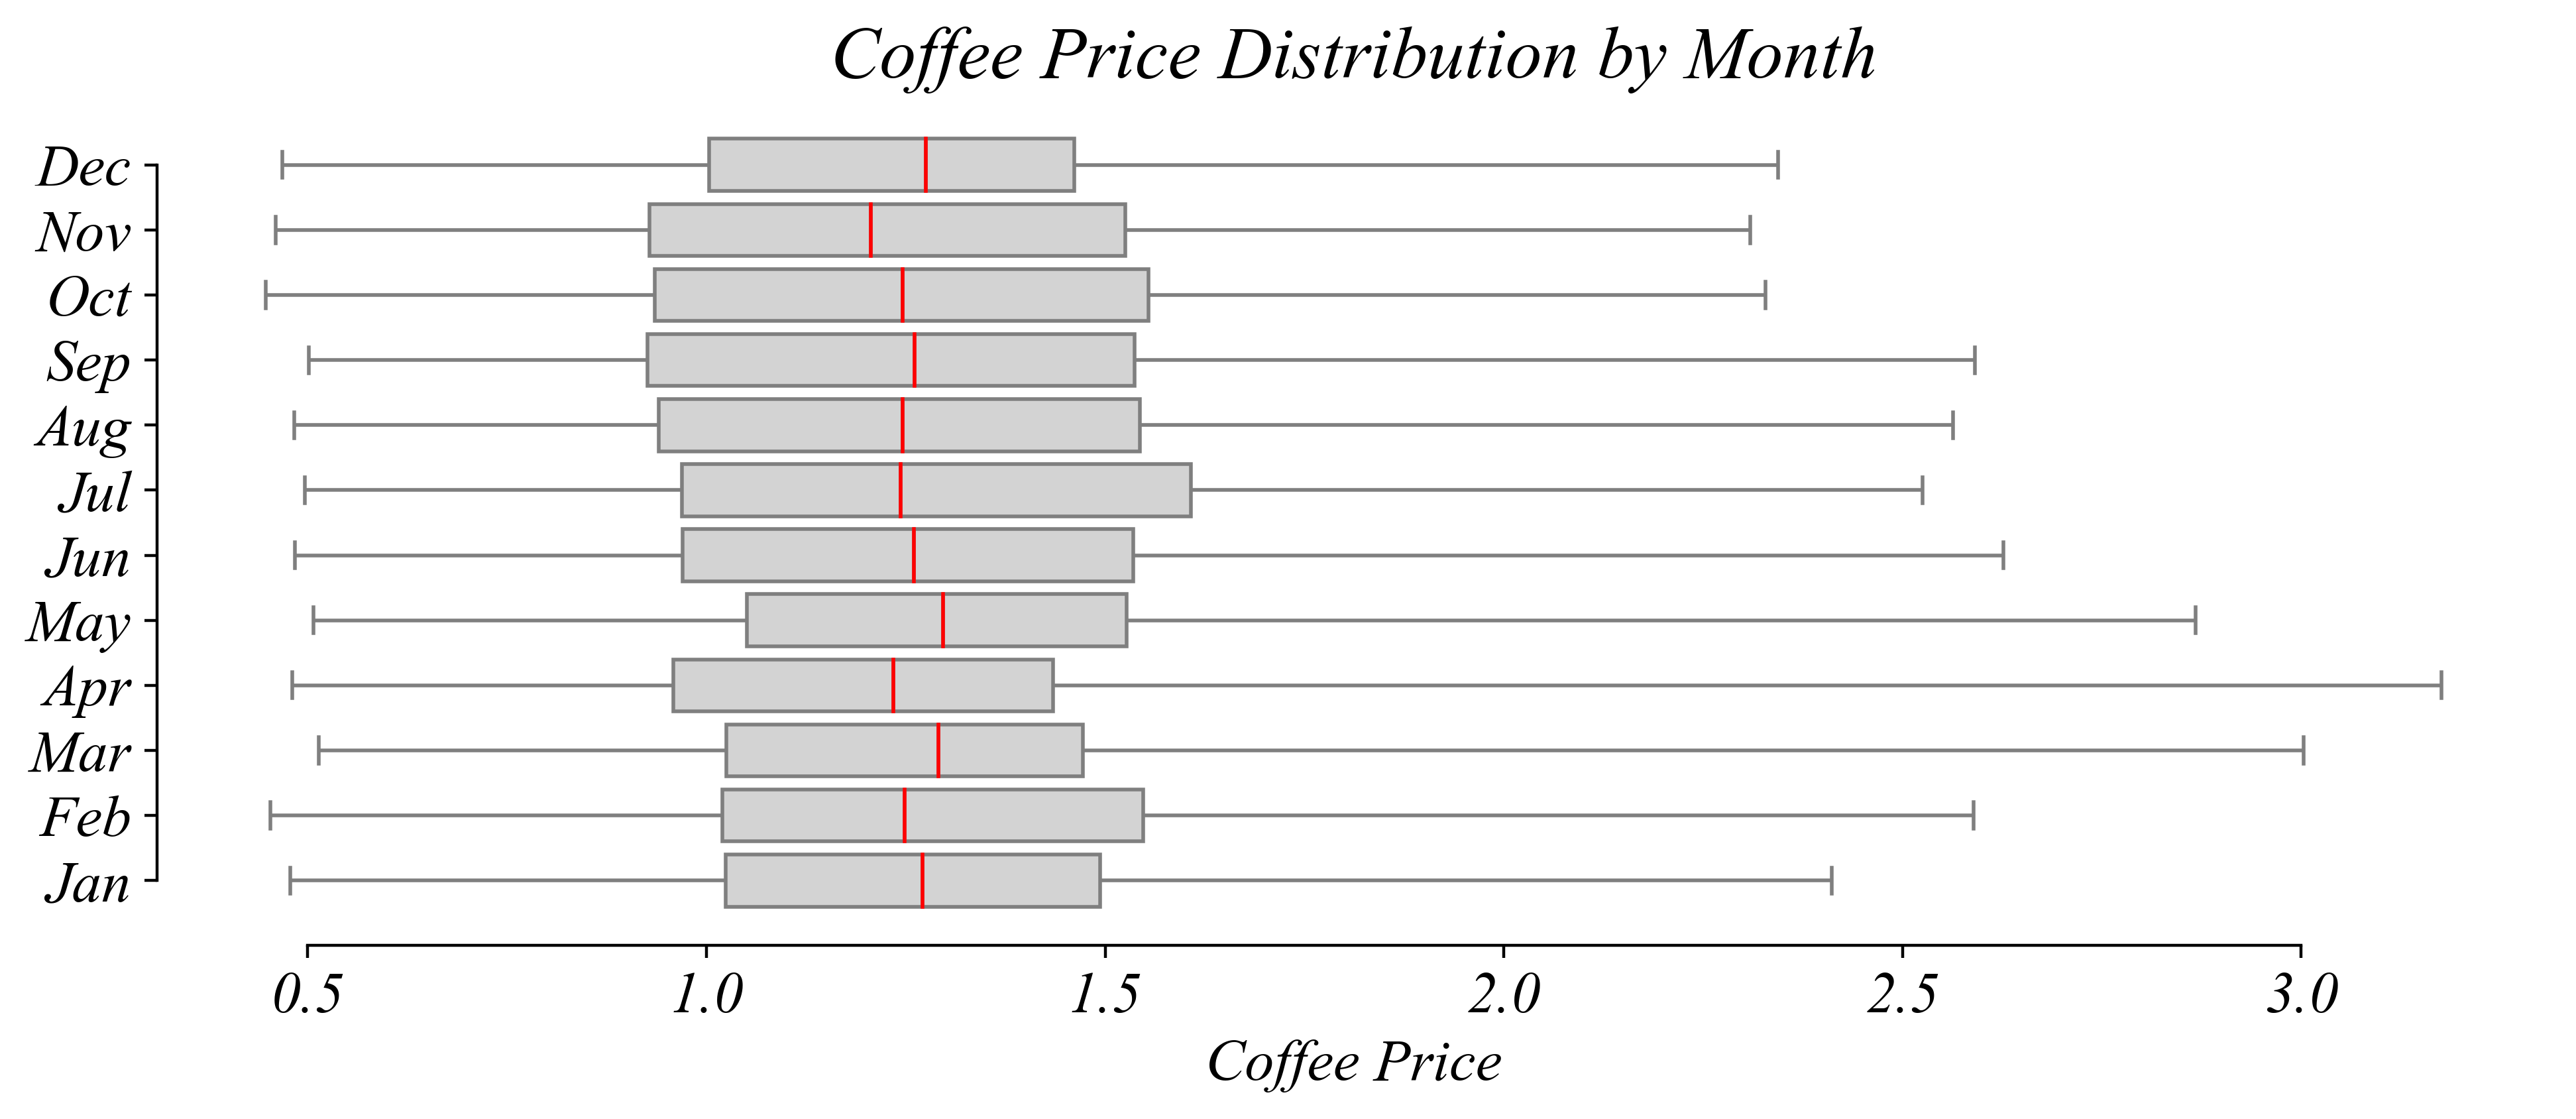

In [19]:
# Load Dataset
data = pd.read_csv('data/Monthly_Coffee_Prices.csv', index_col=0)
data['date'] = pd.to_datetime(data['date'], format='%Y-%m')

# Add month names
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_names = dict(zip(range(1, 13), months))
data['month_name'] = data['date'].dt.month.map(month_names)

# Figure
plt.figure(figsize=(10, 4.5))
sns.boxplot(data, x='price', y='month_name', 
            order=months, color='lightgrey', whis=(0, 100))

data['month'] = data['date'].dt.month
medians = data.groupby('month')['price'].median()
for i, median in enumerate(medians):
    plt.plot([median, median], [i - 0.4, i + 0.4], color='red', linewidth=1, zorder=4)

# Styling
plt.xlabel('Coffee Price')
plt.ylabel('')
plt.title('Coffee Price Distribution by Month')
sns.despine(trim=True)
plt.tight_layout()

plt.ylim(-1,12)

# Save Figure
plt.savefig('i/i_10_median.png')

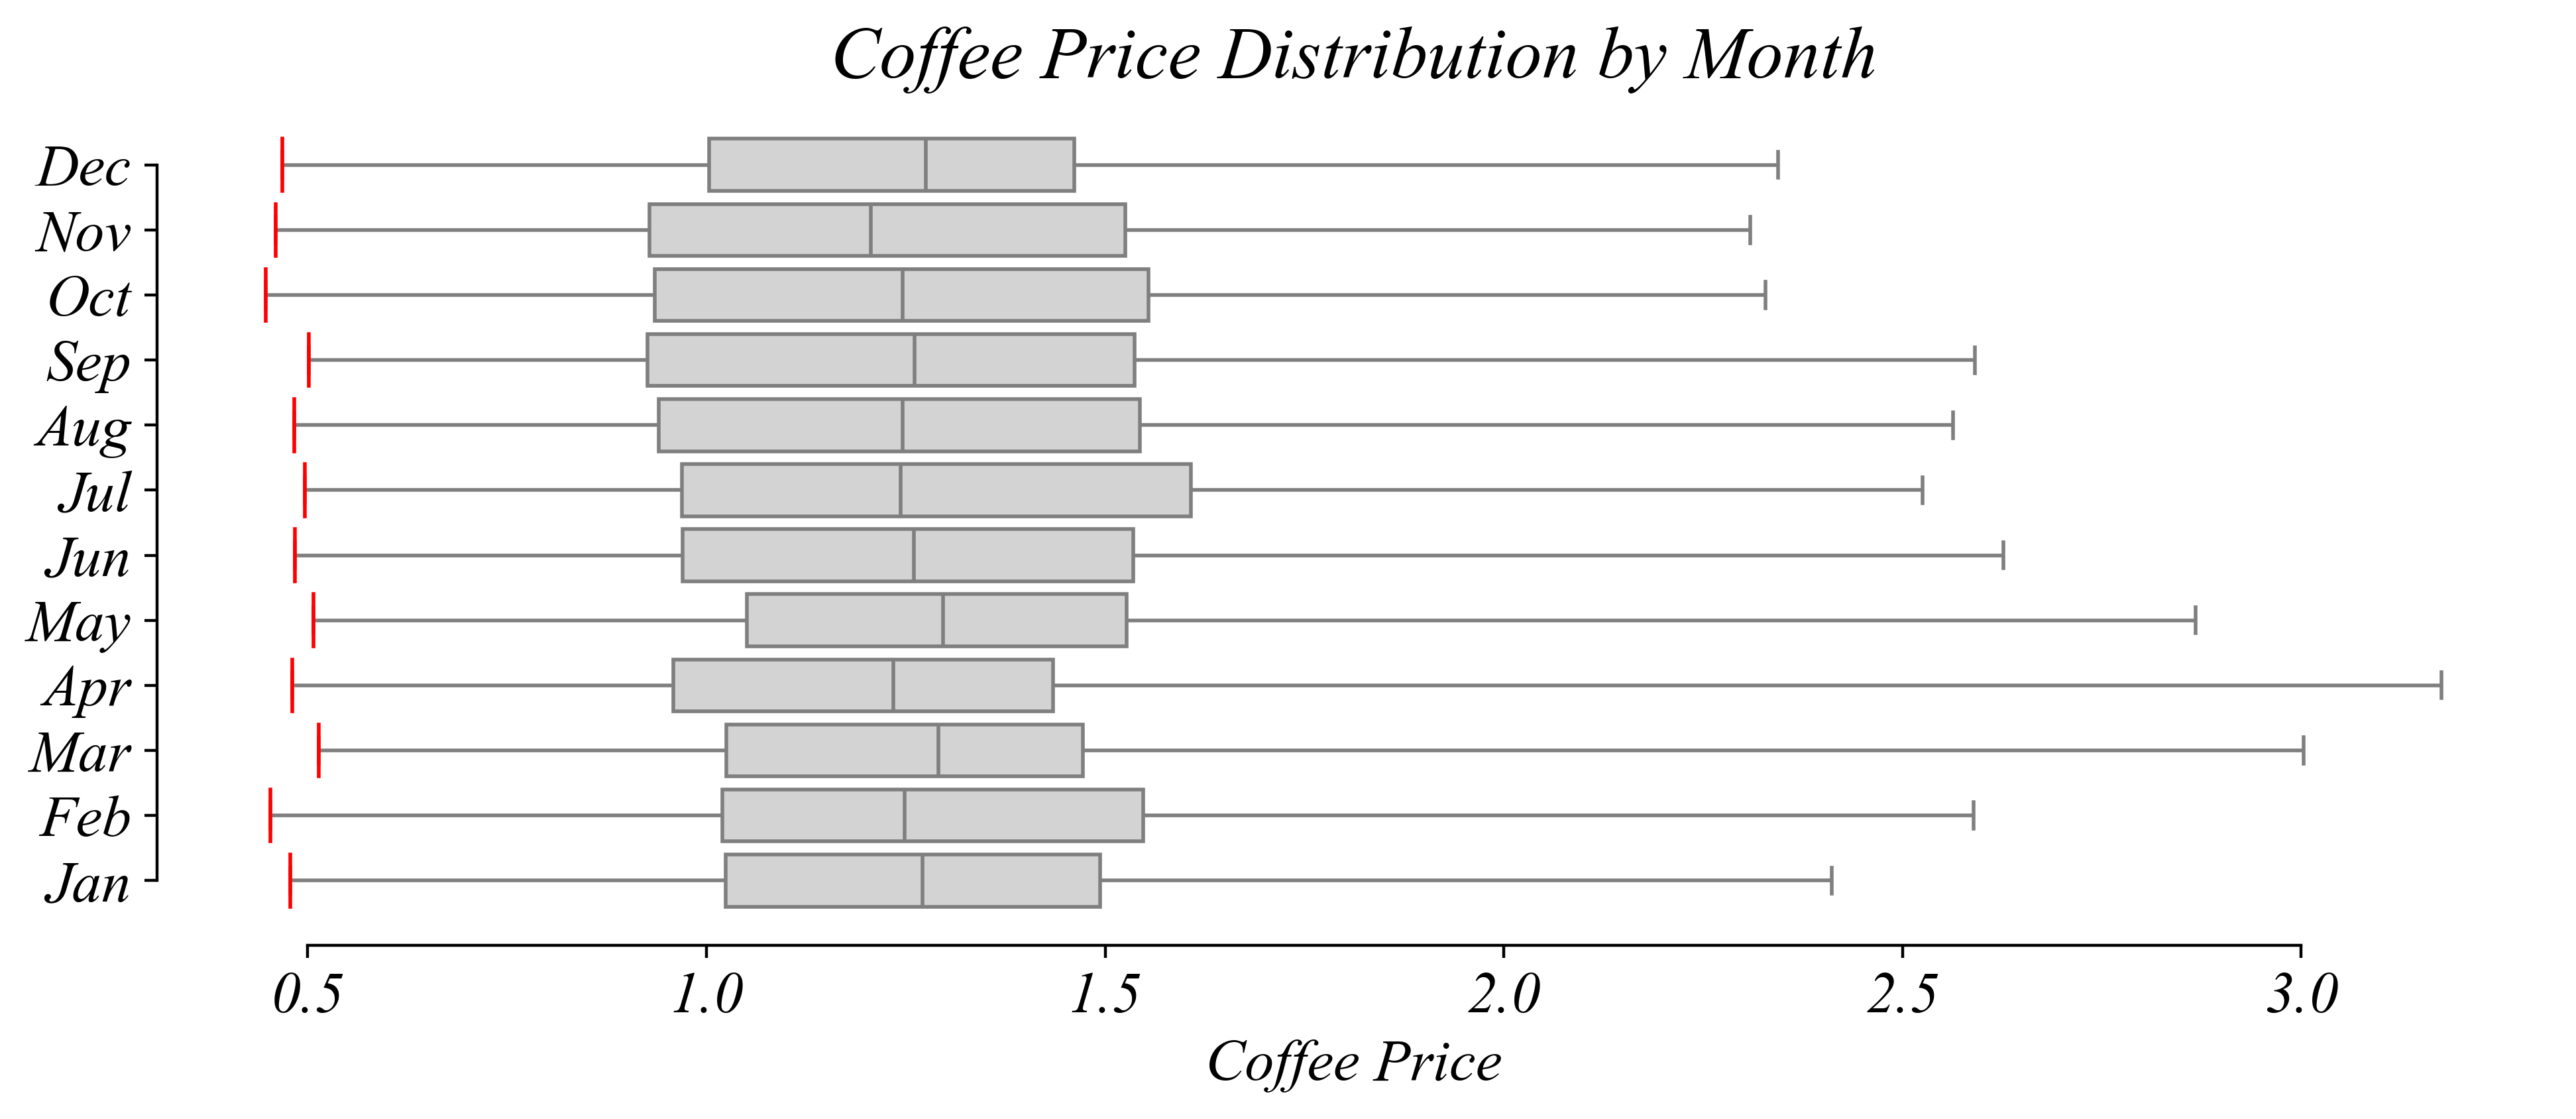

In [20]:
# Load Dataset
data = pd.read_csv('data/Monthly_Coffee_Prices.csv', index_col=0)
data['date'] = pd.to_datetime(data['date'], format='%Y-%m')

# Add month names
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_names = dict(zip(range(1, 13), months))
data['month_name'] = data['date'].dt.month.map(month_names)

# Figure
plt.figure(figsize=(10, 4.5))
sns.boxplot(data, x='price', y='month_name', 
            order=months, color='lightgrey', whis=(0, 100))

data['month'] = data['date'].dt.month
medians = data.groupby('month')['price'].min()
for i, median in enumerate(medians):
    plt.plot([median, median], [i - 0.4, i + 0.4], color='red', linewidth=1, zorder=4)

# Styling
plt.xlabel('Coffee Price')
plt.ylabel('')
plt.title('Coffee Price Distribution by Month')
sns.despine(trim=True)
plt.tight_layout()

plt.ylim(-1,12)

# Save Figure
plt.savefig('i/i_10_min.png')

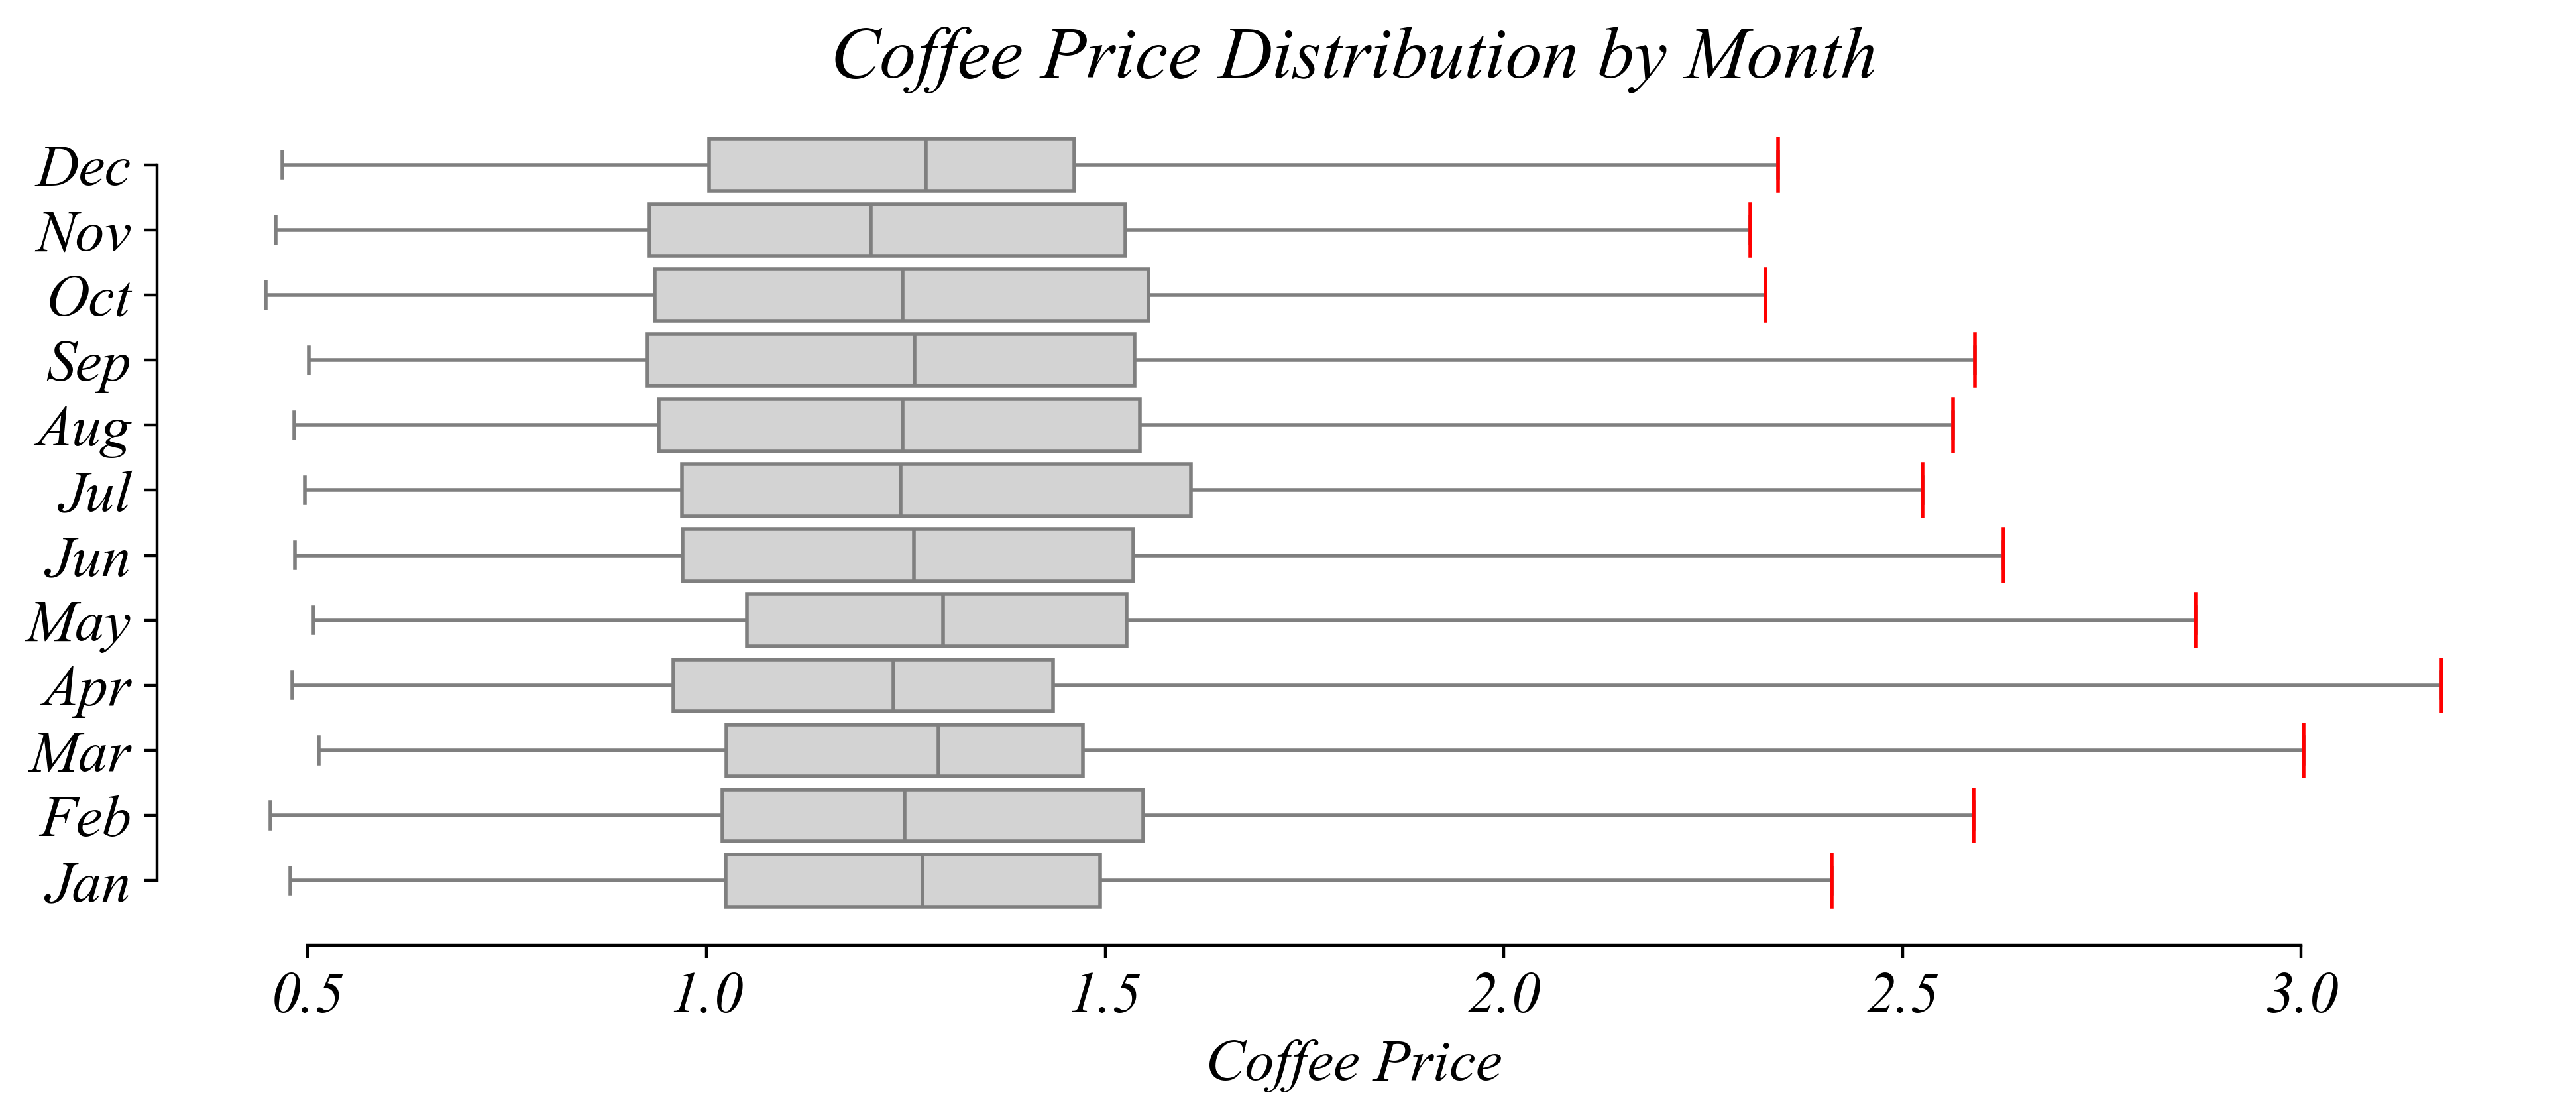

In [21]:
# Load Dataset
data = pd.read_csv('data/Monthly_Coffee_Prices.csv', index_col=0)
data['date'] = pd.to_datetime(data['date'], format='%Y-%m')

# Add month names
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_names = dict(zip(range(1, 13), months))
data['month_name'] = data['date'].dt.month.map(month_names)

# Figure
plt.figure(figsize=(10, 4.5))
sns.boxplot(data, x='price', y='month_name', 
            order=months, color='lightgrey', whis=(0, 100))

data['month'] = data['date'].dt.month
medians = data.groupby('month')['price'].max()
for i, median in enumerate(medians):
    plt.plot([median, median], [i - 0.4, i + 0.4], color='red', linewidth=1, zorder=4)

# Styling
plt.xlabel('Coffee Price')
plt.ylabel('')
plt.title('Coffee Price Distribution by Month')
sns.despine(trim=True)
plt.tight_layout()

plt.ylim(-1,12)

# Save Figure
plt.savefig('i/i_10_max.png')

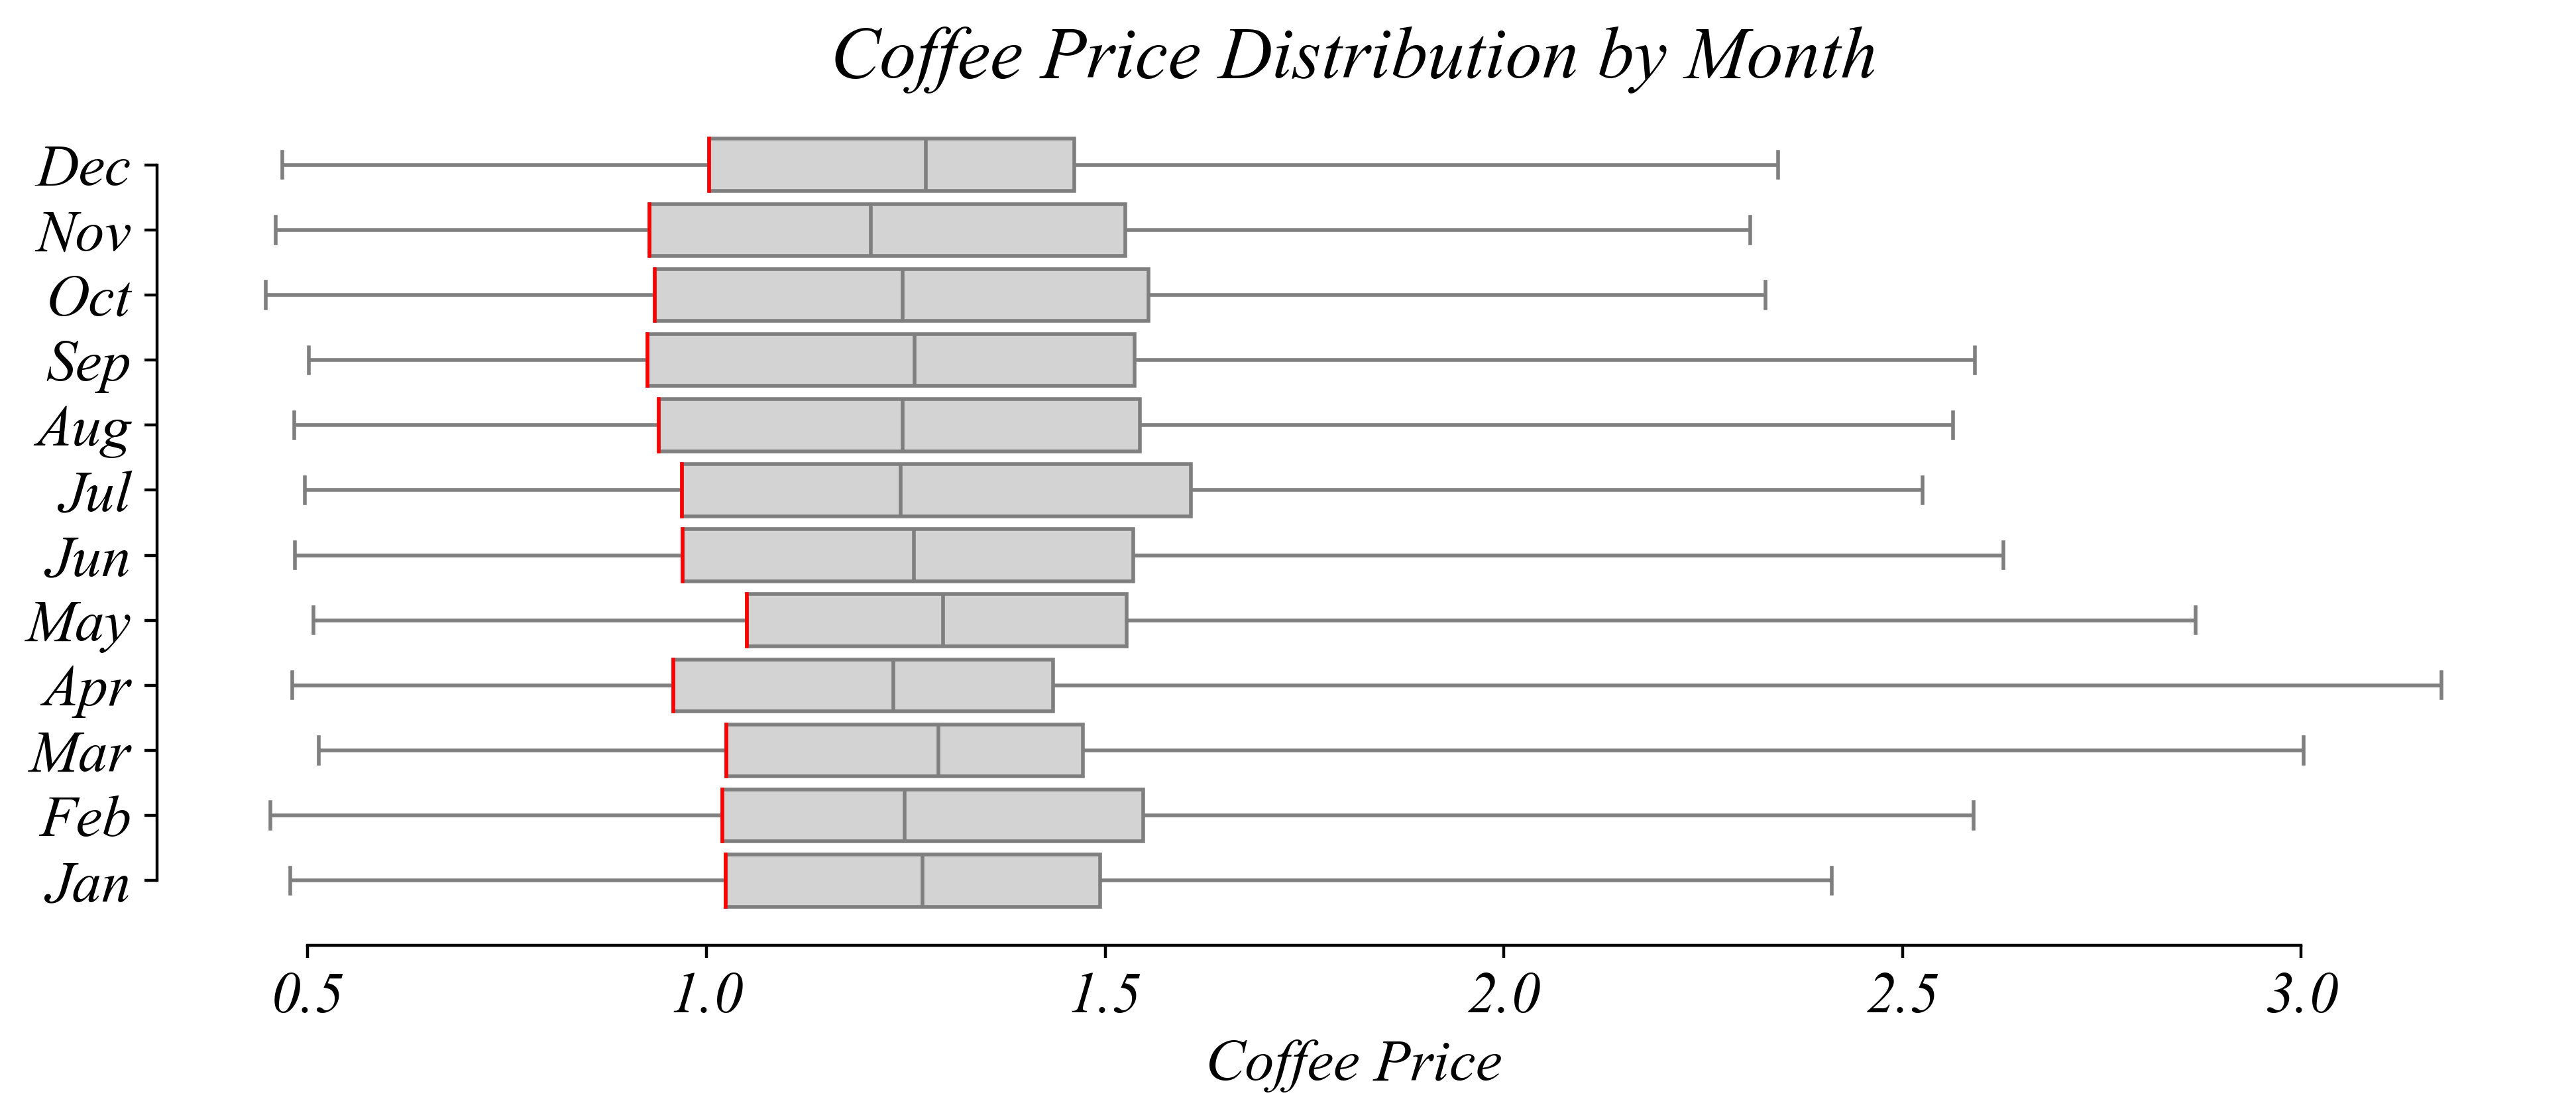

In [22]:
# Load Dataset
data = pd.read_csv('data/Monthly_Coffee_Prices.csv', index_col=0)
data['date'] = pd.to_datetime(data['date'], format='%Y-%m')

# Add month names
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_names = dict(zip(range(1, 13), months))
data['month_name'] = data['date'].dt.month.map(month_names)

# Figure
plt.figure(figsize=(10, 4.5))
sns.boxplot(data, x='price', y='month_name', 
            order=months, color='lightgrey', whis=(0, 100))

data['month'] = data['date'].dt.month
medians = data.groupby('month')['price'].quantile(0.25)
for i, median in enumerate(medians):
    plt.plot([median, median], [i - 0.4, i + 0.4], color='red', linewidth=1, zorder=4)

# Styling
plt.xlabel('Coffee Price')
plt.ylabel('')
plt.title('Coffee Price Distribution by Month')
sns.despine(trim=True)
plt.tight_layout()

plt.ylim(-1,12)

# Save Figure
plt.savefig('i/i_10_q1.png')

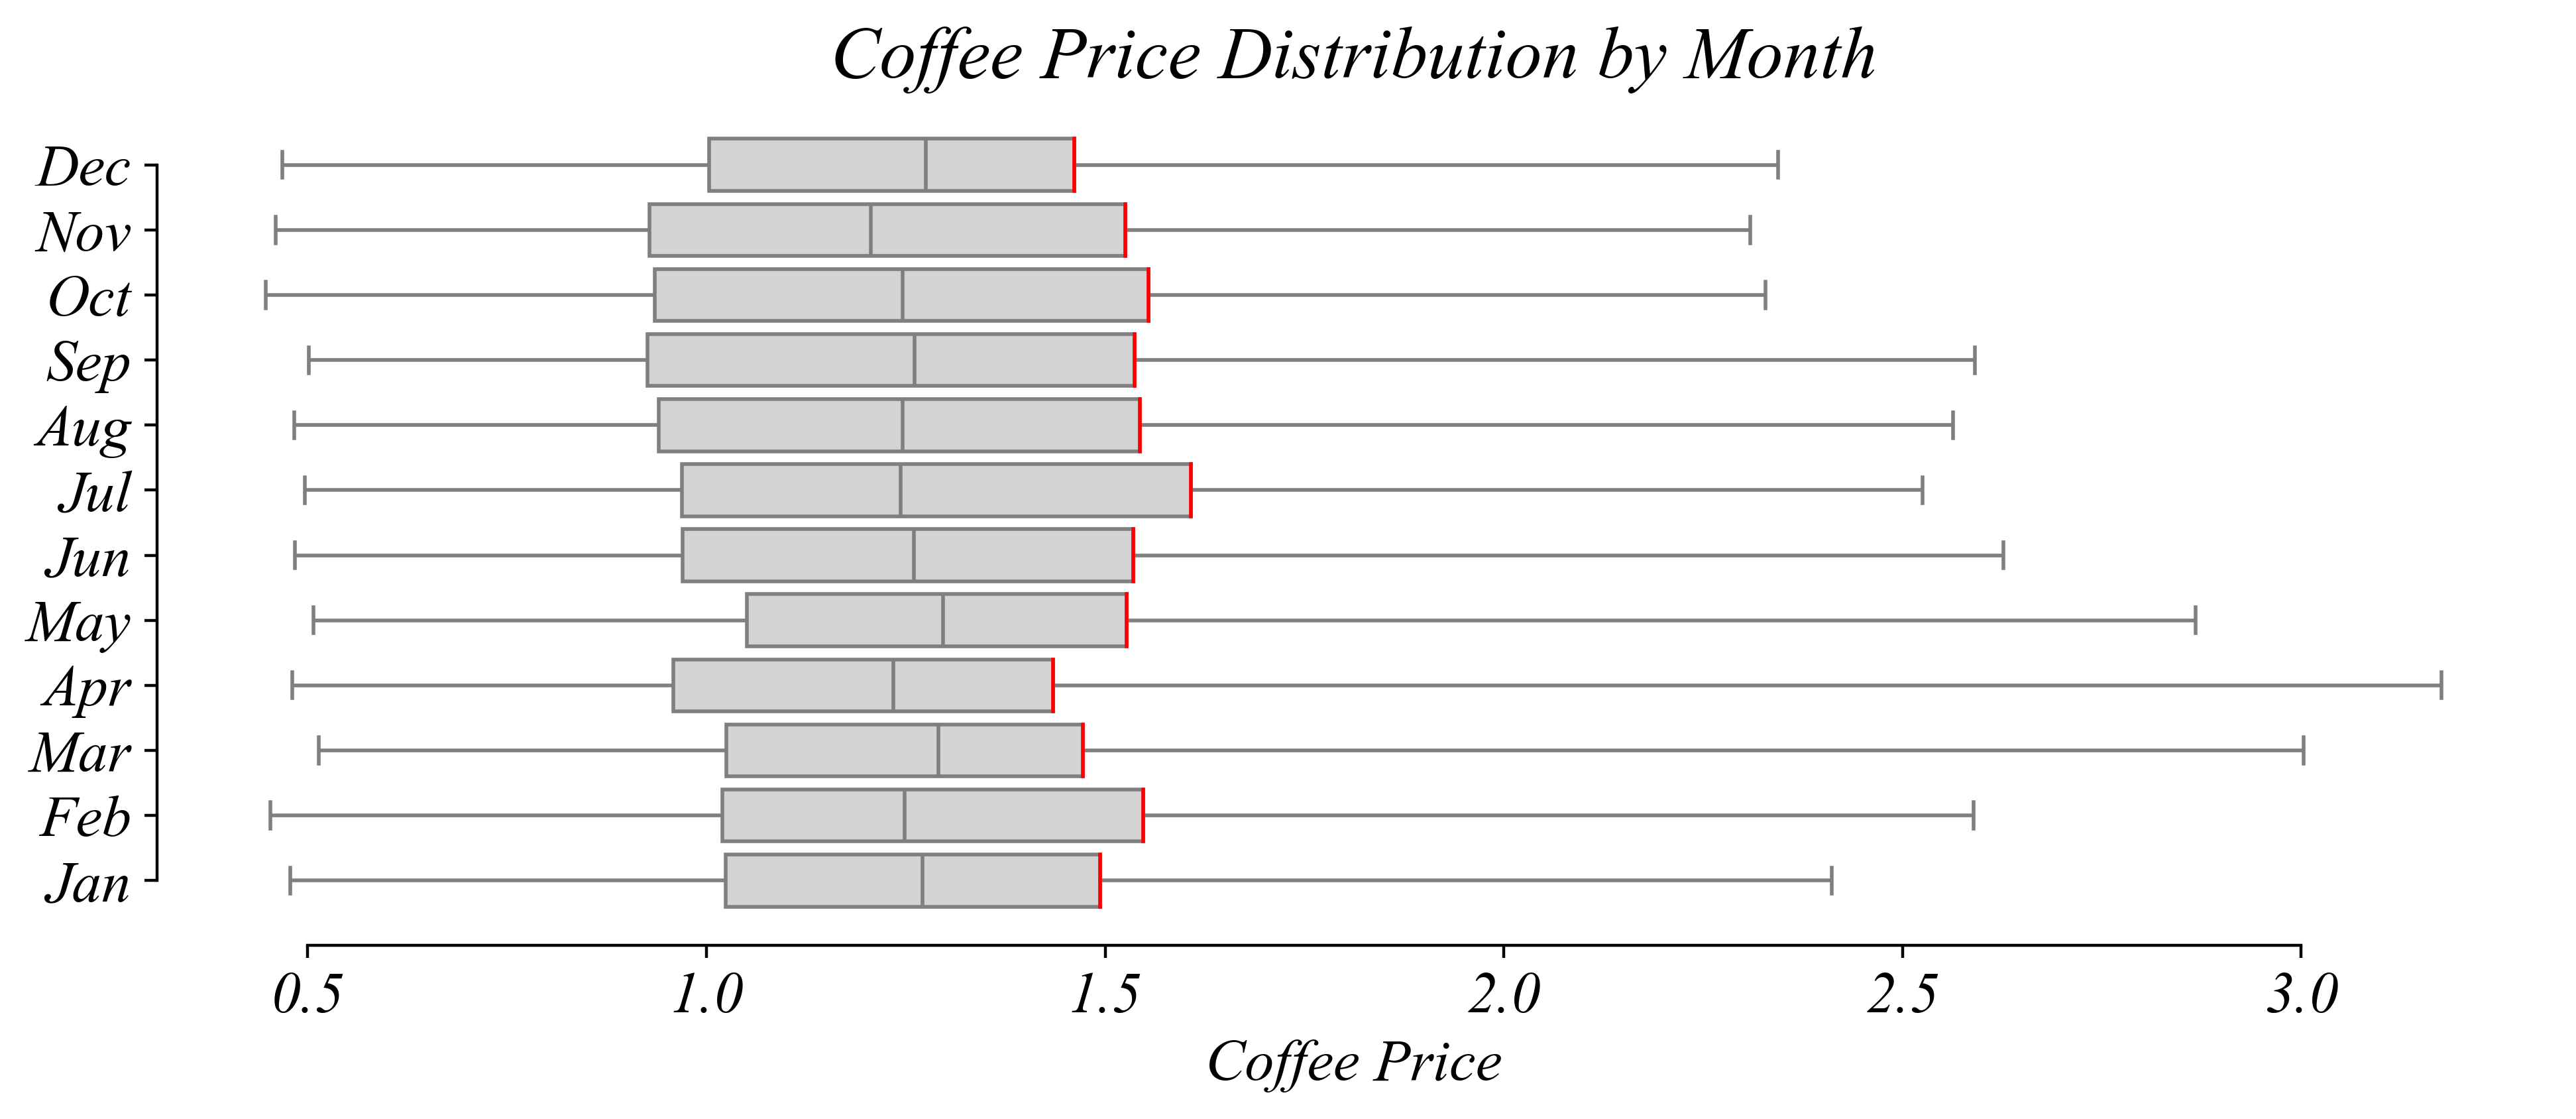

In [23]:
# Load Dataset
data = pd.read_csv('data/Monthly_Coffee_Prices.csv', index_col=0)
data['date'] = pd.to_datetime(data['date'], format='%Y-%m')

# Add month names
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_names = dict(zip(range(1, 13), months))
data['month_name'] = data['date'].dt.month.map(month_names)

# Figure
plt.figure(figsize=(10, 4.5))
sns.boxplot(data, x='price', y='month_name', 
            order=months, color='lightgrey', whis=(0, 100))

data['month'] = data['date'].dt.month
medians = data.groupby('month')['price'].quantile(0.75)
for i, median in enumerate(medians):
    plt.plot([median, median], [i - 0.4, i + 0.4], color='red', linewidth=1, zorder=4)

# Styling
plt.xlabel('Coffee Price')
plt.ylabel('')
plt.title('Coffee Price Distribution by Month')
sns.despine(trim=True)
plt.tight_layout()

plt.ylim(-1,12)

# Save Figure
plt.savefig('i/i_10_q3.png')

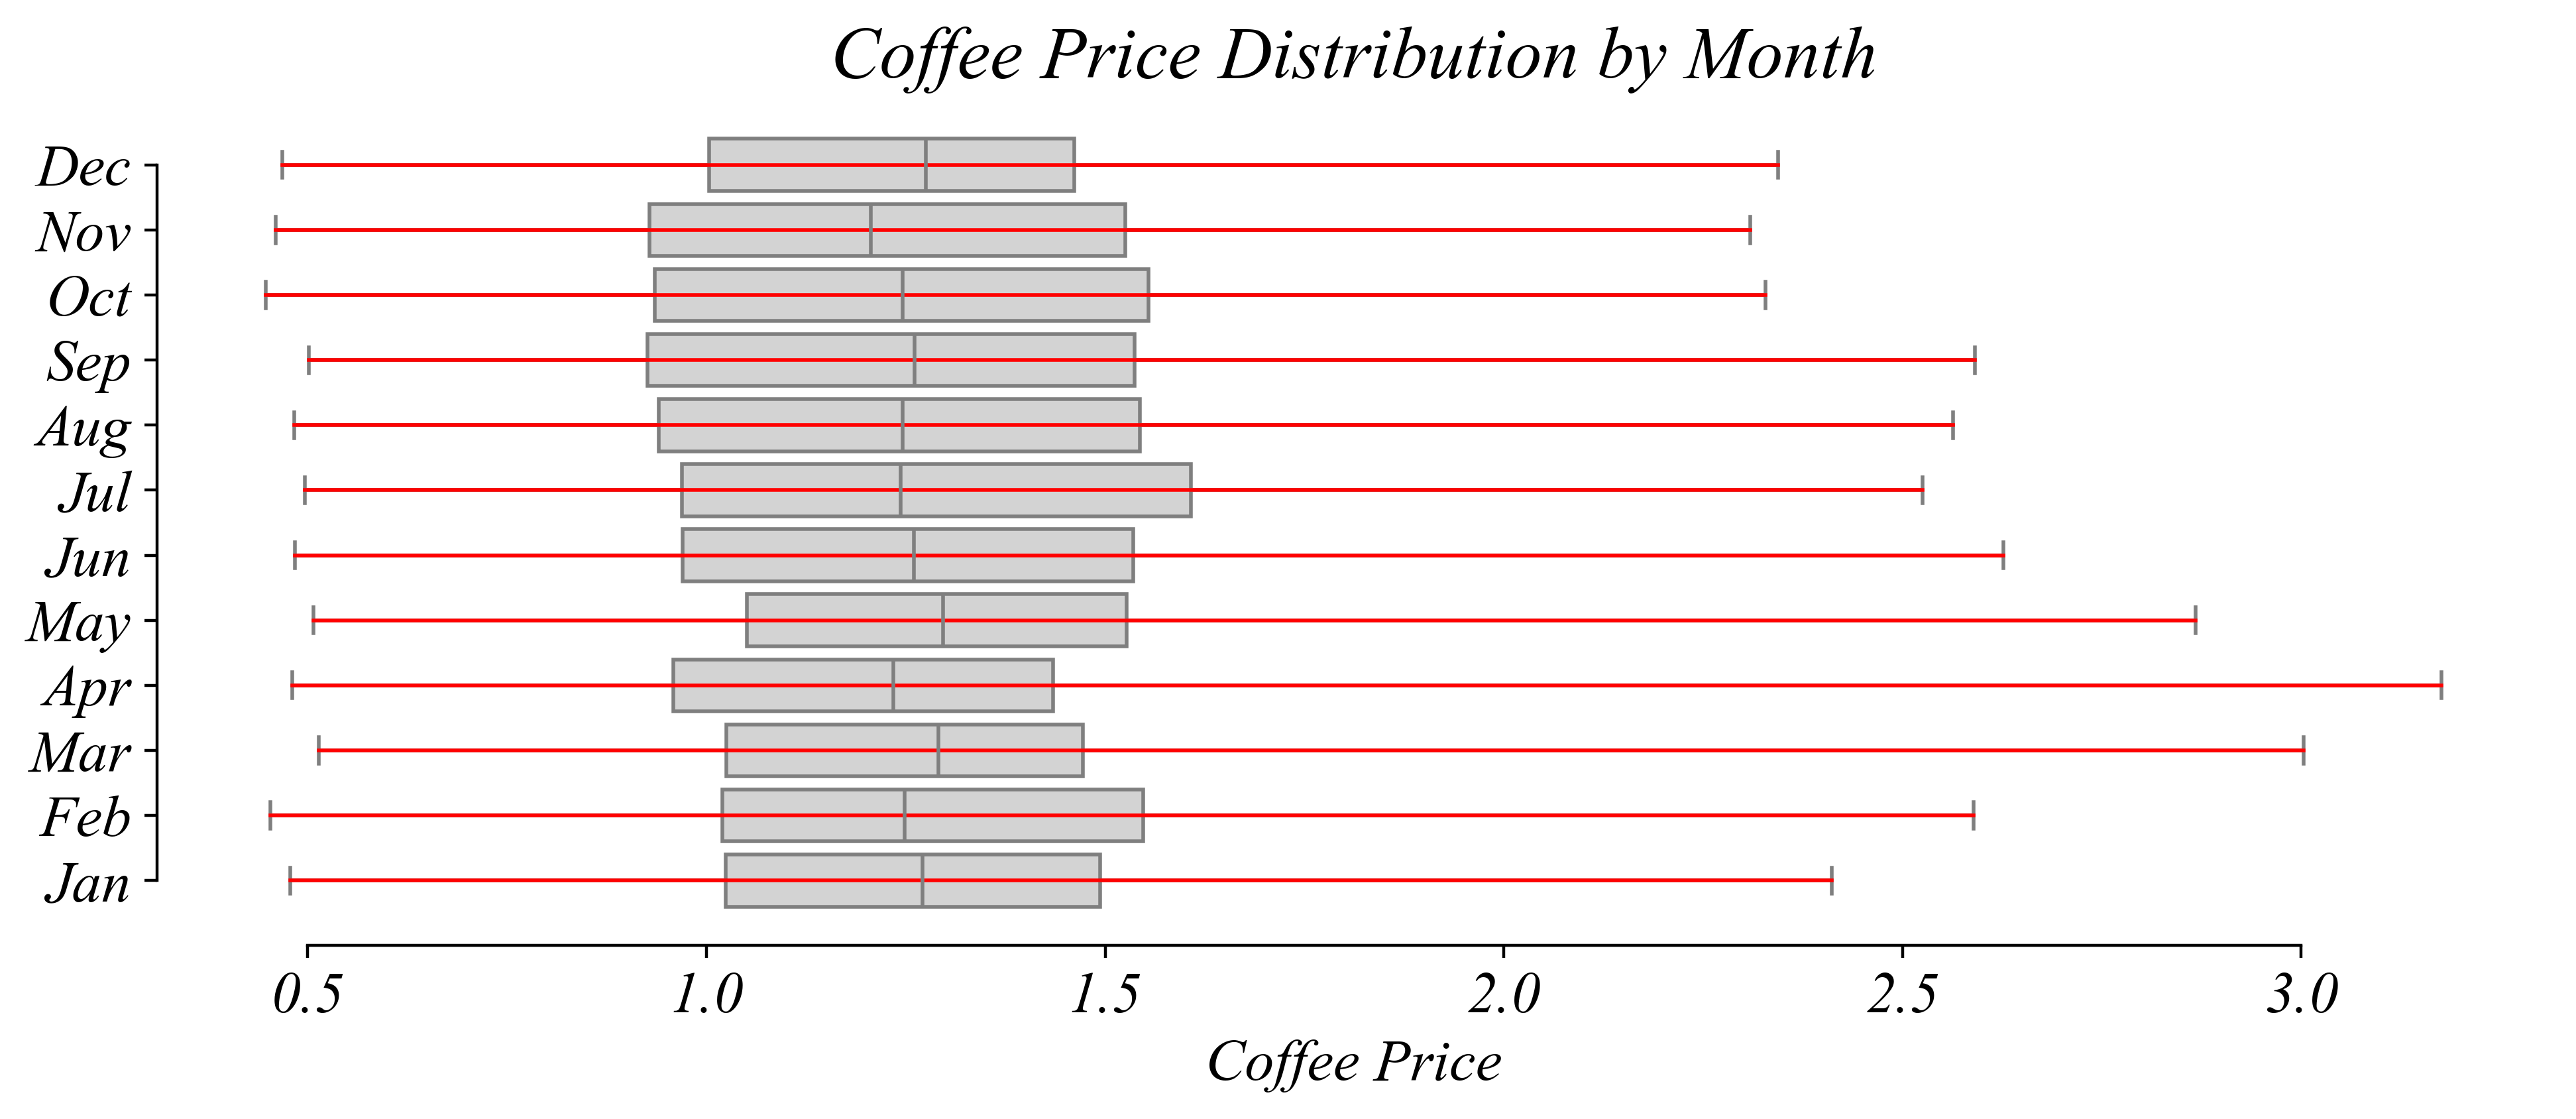

In [24]:
# Load Dataset
data = pd.read_csv('data/Monthly_Coffee_Prices.csv', index_col=0)
data['date'] = pd.to_datetime(data['date'], format='%Y-%m')

# Add month names
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_names = dict(zip(range(1, 13), months))
data['month_name'] = data['date'].dt.month.map(month_names)

# Figure
plt.figure(figsize=(10, 4.5))
sns.boxplot(data, x='price', y='month_name', 
            order=months, color='lightgrey', whis=(0, 100))

data['month'] = data['date'].dt.month
mins = data.groupby('month')['price'].min()
maxes = data.groupby('month')['price'].max()
for i, (min,max) in enumerate(zip(mins,maxes)):
    plt.plot([min, max], [i, i], color='red', linewidth=1)
    
# Styling
plt.xlabel('Coffee Price')
plt.ylabel('')
plt.title('Coffee Price Distribution by Month')
sns.despine(trim=True)
plt.tight_layout()

plt.ylim(-1,12)

# Save Figure
plt.savefig('i/i_10_range.png')

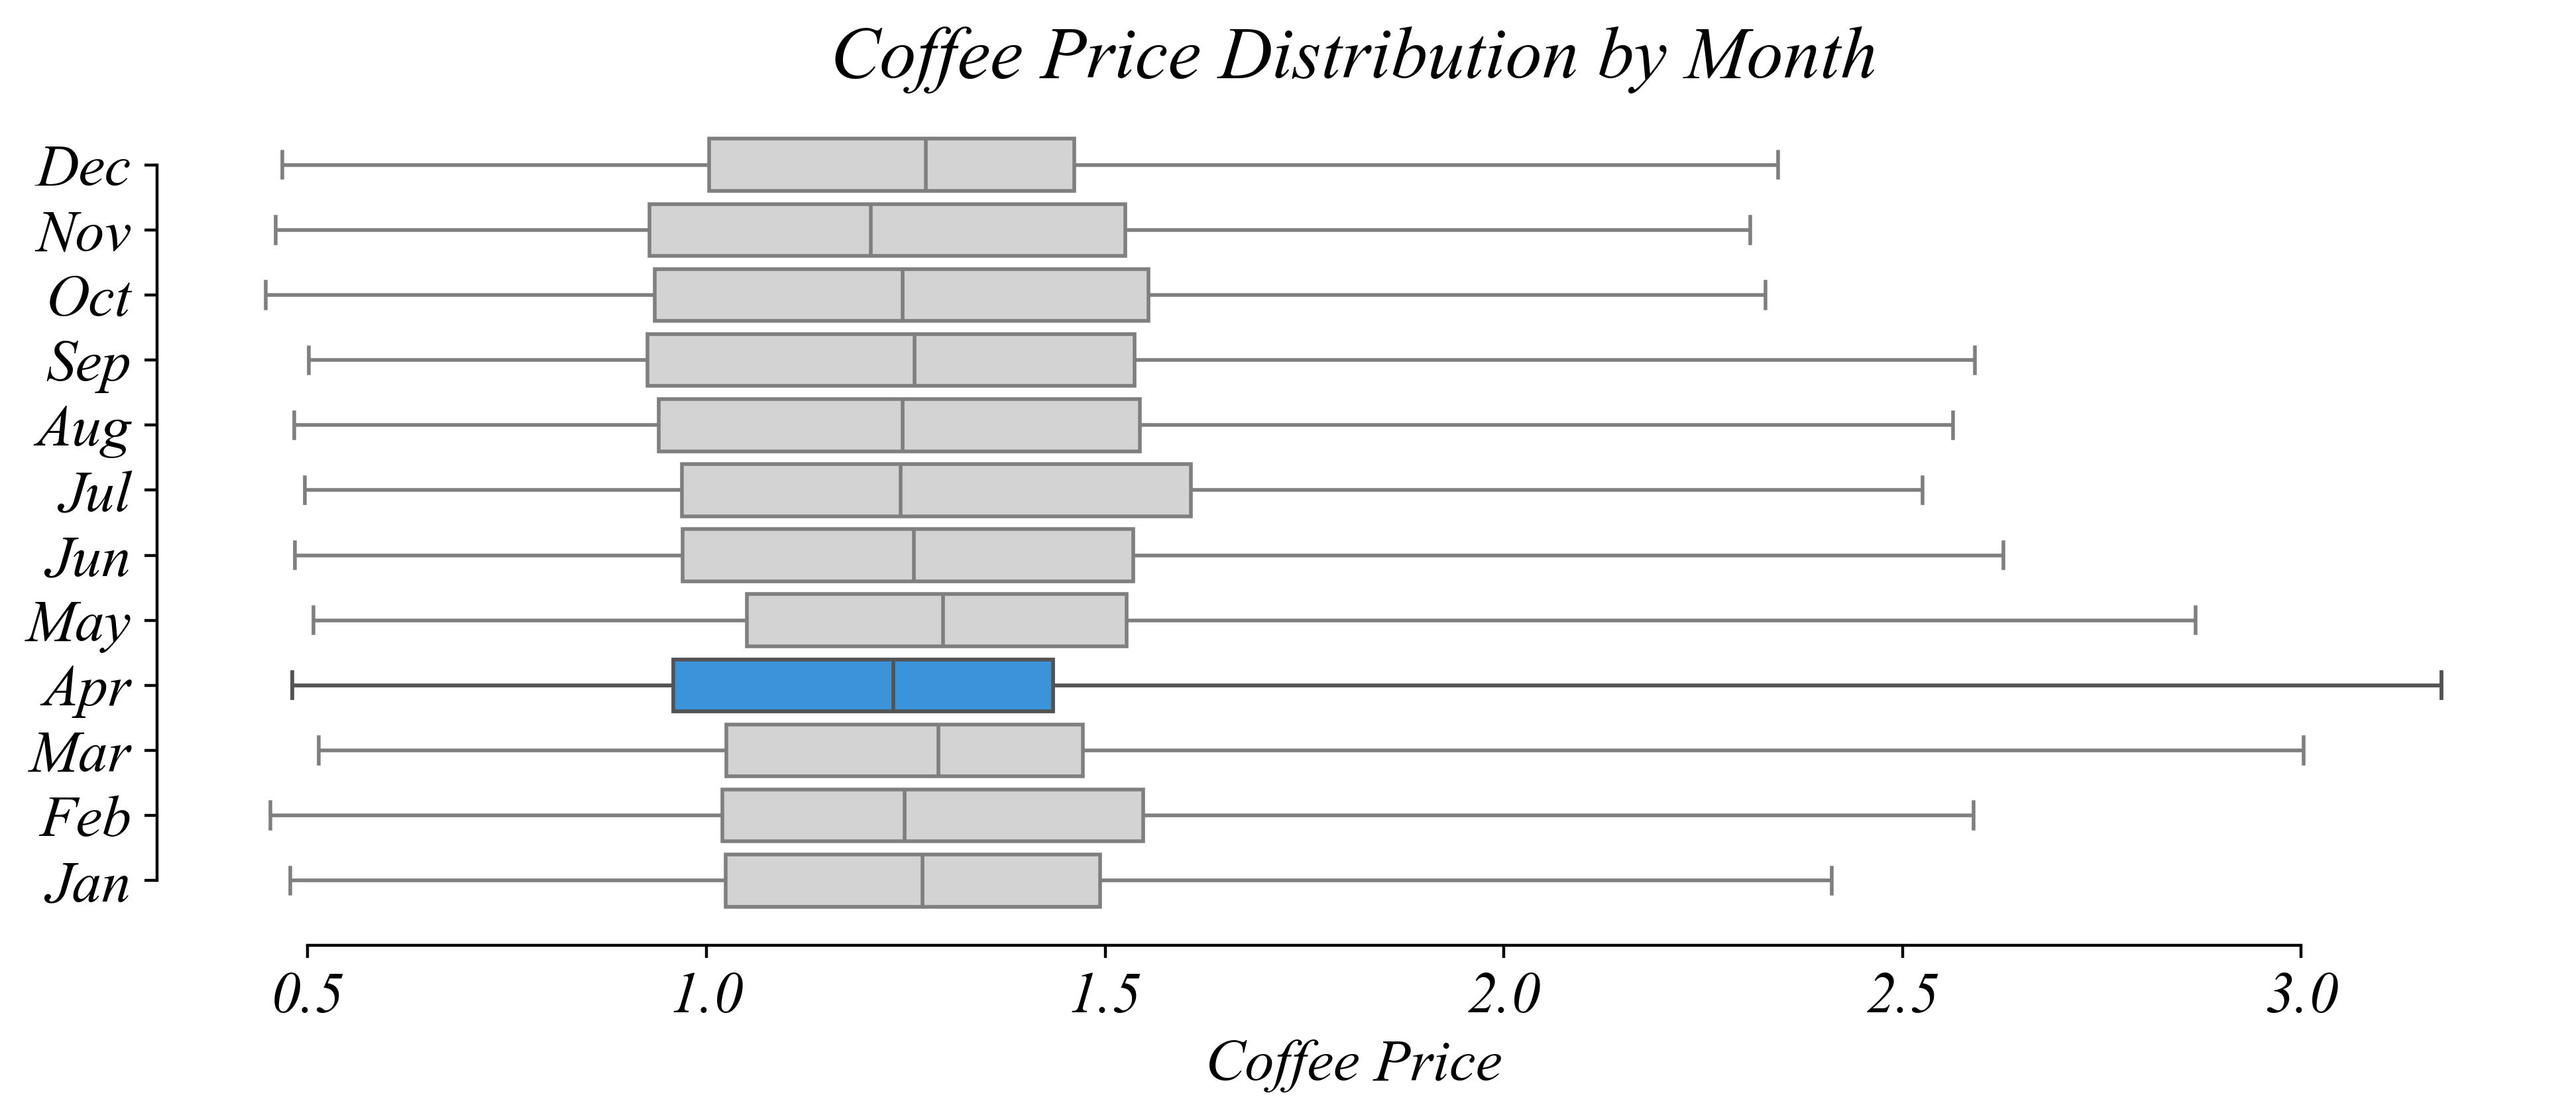

In [25]:
# Load Dataset
data = pd.read_csv('data/Monthly_Coffee_Prices.csv', index_col=0)
data['date'] = pd.to_datetime(data['date'], format='%Y-%m')

# Add month names
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_names = dict(zip(range(1, 13), months))
data['month_name'] = data['date'].dt.month.map(month_names)

# Figure
plt.figure(figsize=(10, 4.5))
sns.boxplot(data, x='price', y='month_name', order=months, color='lightgrey', whis=(0, 100))

subdata = data[data['month_name'] == 'Apr']
sns.boxplot(subdata, x='price', y='month_name', order=months, color='#2196F3', whis=(0, 100))

# Styling
plt.xlabel('Coffee Price')
plt.ylabel('')
plt.title('Coffee Price Distribution by Month')
sns.despine(trim=True)
plt.tight_layout()

plt.ylim(-1,12)

# Save Figure
plt.savefig('i/i_11.png')

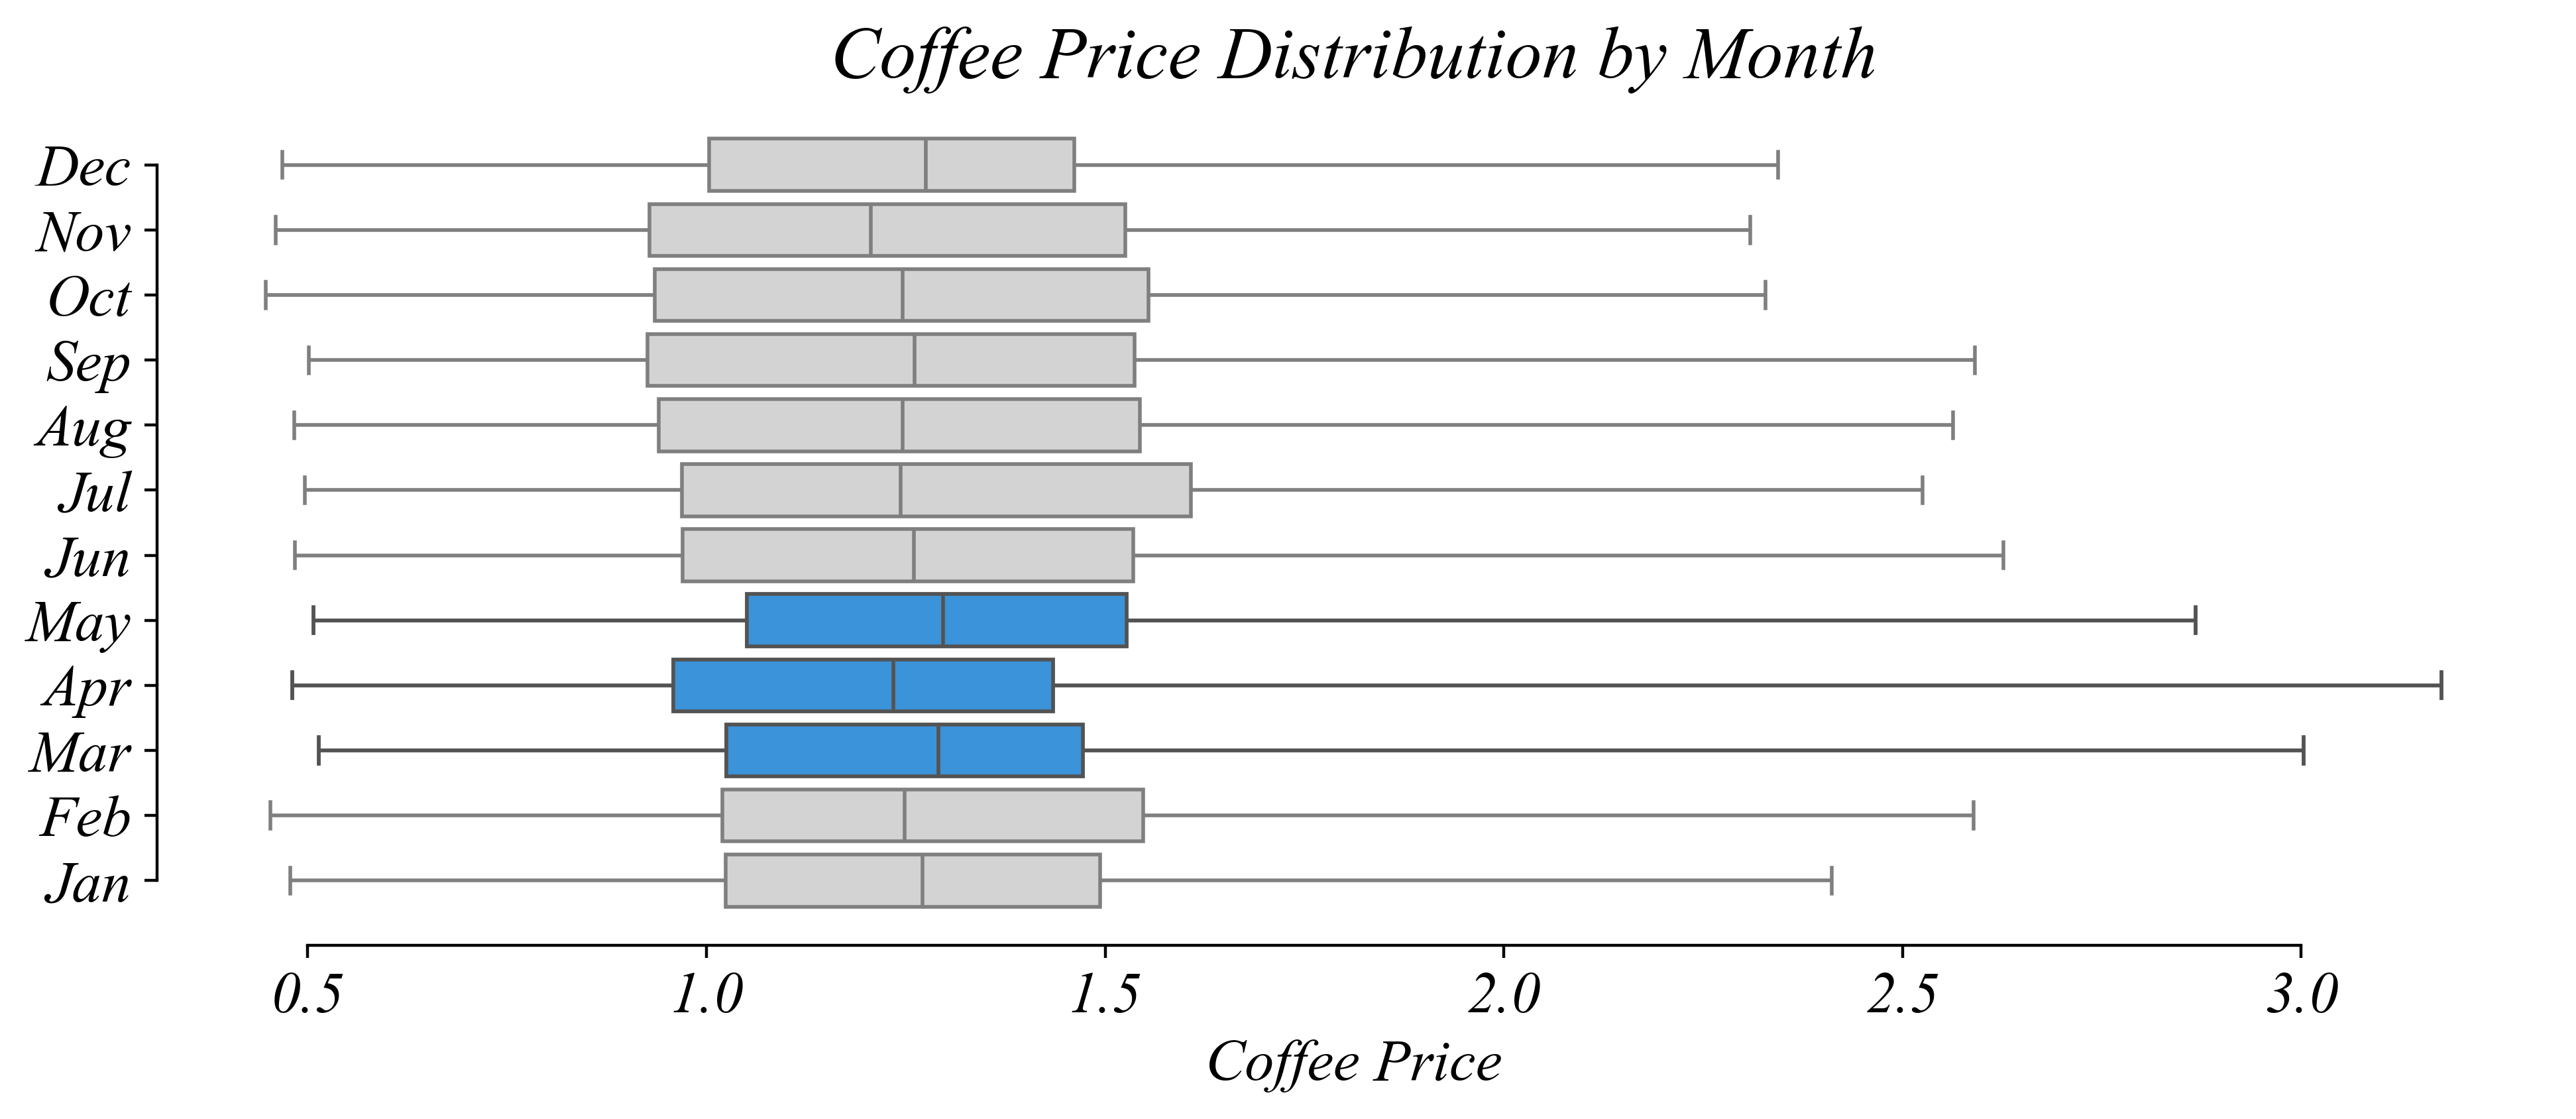

In [26]:
# Load Dataset
data = pd.read_csv('data/Monthly_Coffee_Prices.csv', index_col=0)
data['date'] = pd.to_datetime(data['date'], format='%Y-%m')

# Add month names
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_names = dict(zip(range(1, 13), months))
data['month_name'] = data['date'].dt.month.map(month_names)

# Figure
plt.figure(figsize=(10, 4.5))
sns.boxplot(data, x='price', y='month_name', order=months, color='lightgrey', whis=(0, 100))

subdata = data[data['month_name'].isin(['Mar', 'Apr', 'May'])]
sns.boxplot(subdata, x='price', y='month_name', order=months, color='#2196F3', whis=(0, 100))

# Styling
plt.xlabel('Coffee Price')
plt.ylabel('')
plt.title('Coffee Price Distribution by Month')
sns.despine(trim=True)
plt.tight_layout()

plt.ylim(-1,12)

# Save Figure
plt.savefig('i/i_12.png')

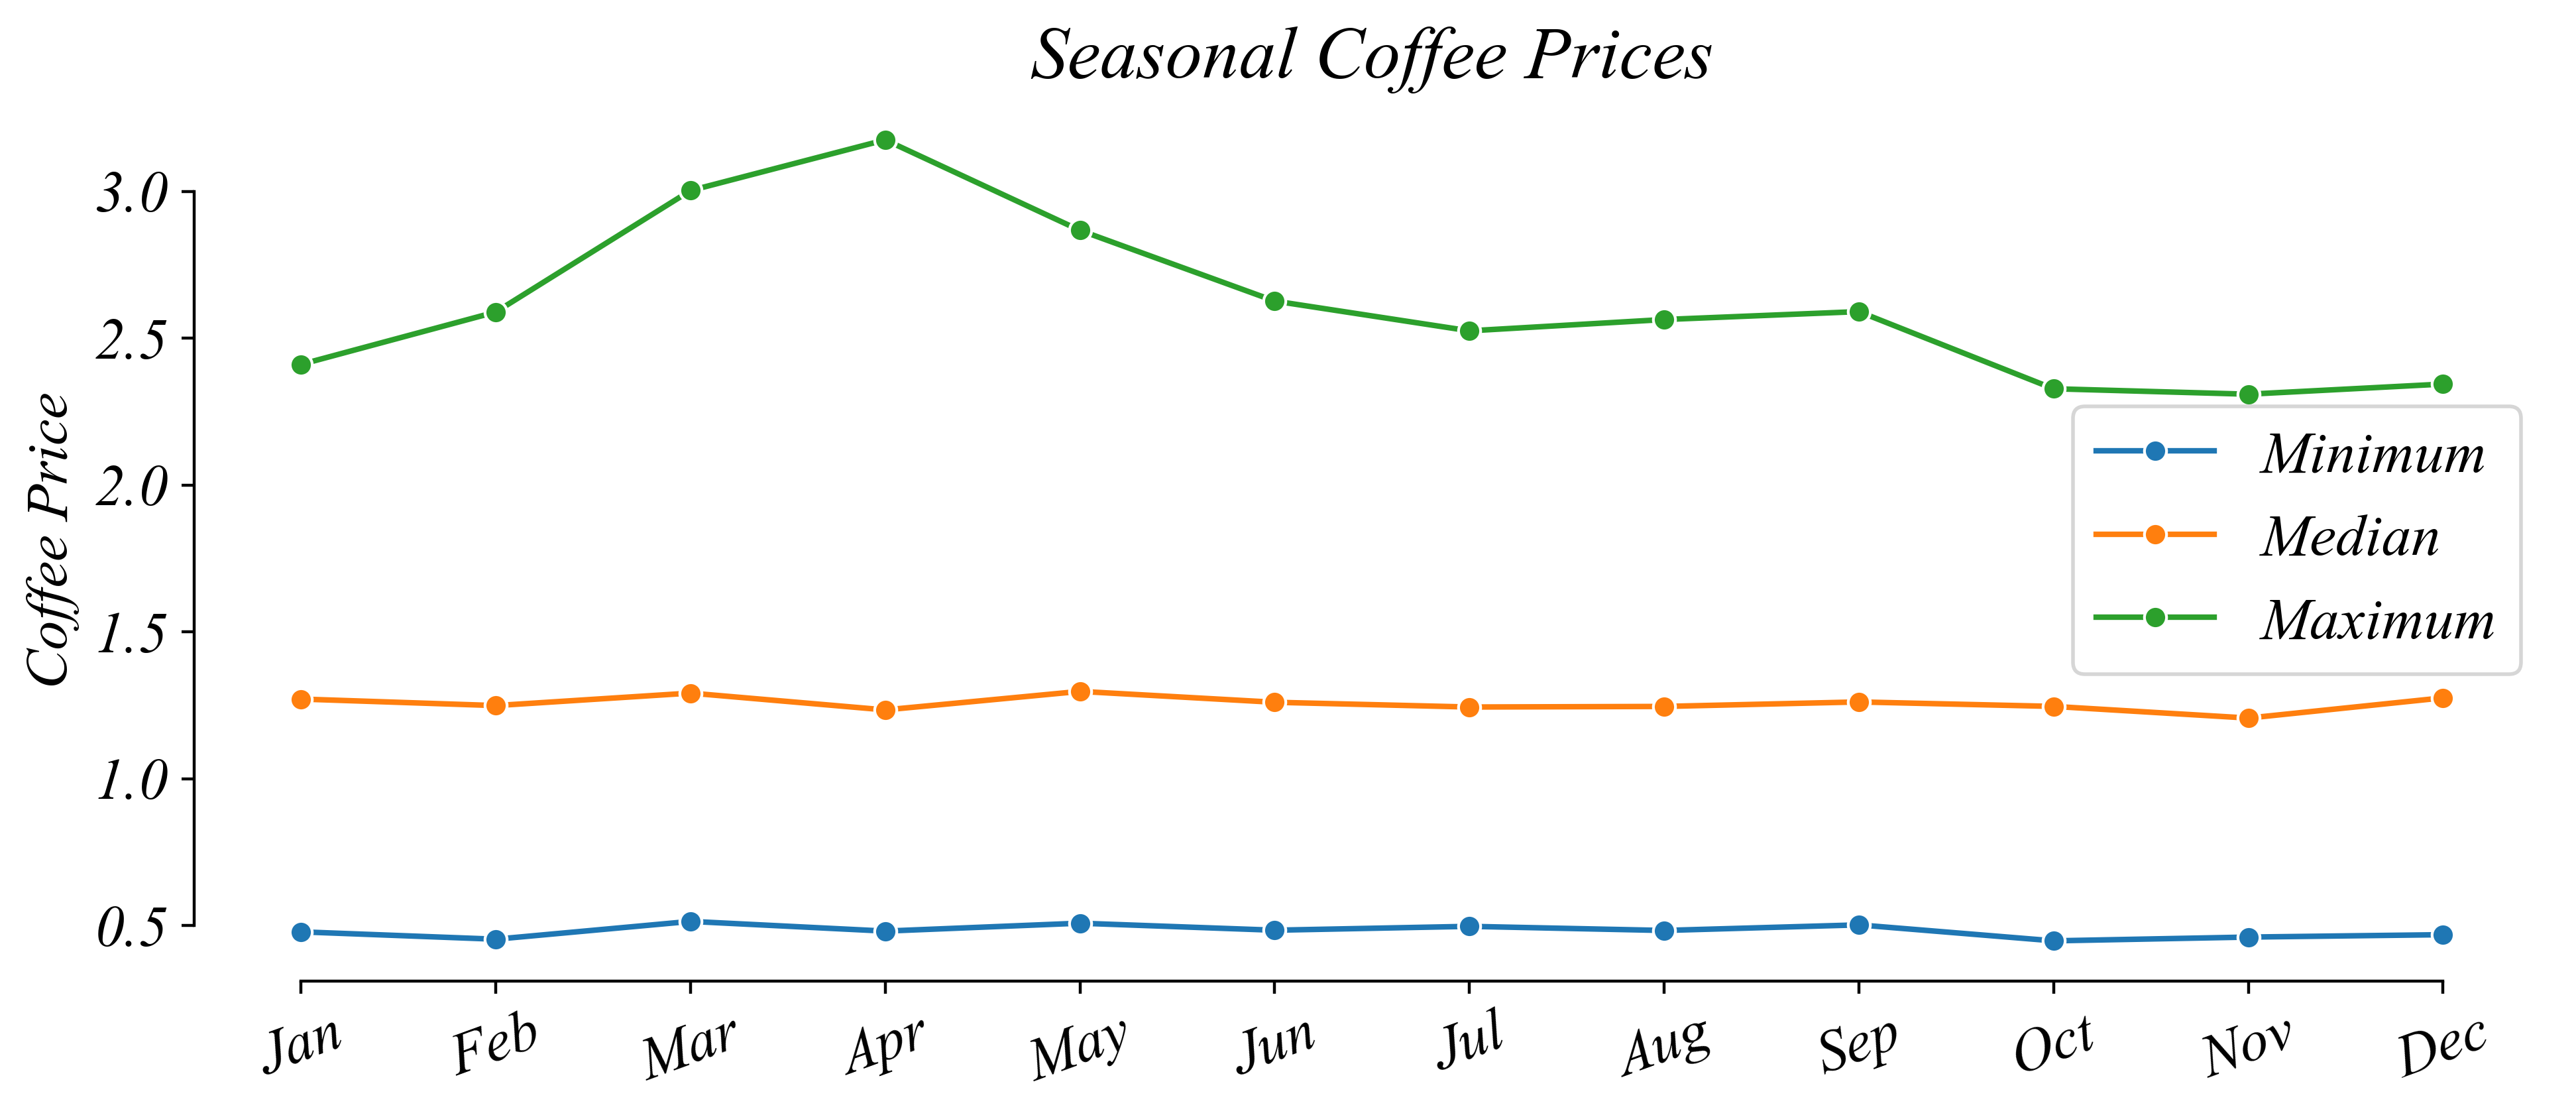

In [27]:
import calendar

# Load Dataset
data = pd.read_csv('data/Monthly_Coffee_Prices.csv', index_col=0)
data['date'] = pd.to_datetime(data['date'], format='%Y-%m')

# Calculate summary statistics
data['month'] = data['date'].dt.month
summary = data.groupby('month')['price'].describe()[['min', '50%', 'max']]
summary.columns = ['Minimum', 'Median', 'Maximum']
summary = summary.reset_index()

# Add month names for x-axis
summary['month_name'] = summary['month'].apply(lambda x: calendar.month_abbr[x])

# Melt the dataframe for seaborn
summary_melted = summary.melt(id_vars=['month', 'month_name'], 
                              var_name='Statistic', 
                              value_name='Price')

# Figure
plt.figure(figsize=(10, 4.5))

# Use seaborn lineplot
sns.lineplot(data=summary_melted, x='month_name', y='Price', 
             hue='Statistic', marker='o', 
             hue_order=['Minimum', 'Median', 'Maximum'])

# Styling
plt.xlabel('')
plt.ylabel('Coffee Price')
plt.title('Seasonal Coffee Prices')
plt.xticks(rotation=20)
plt.legend(title='')
sns.despine(trim=True)
plt.tight_layout()

# Save Figure
plt.savefig('i/i_13.png')

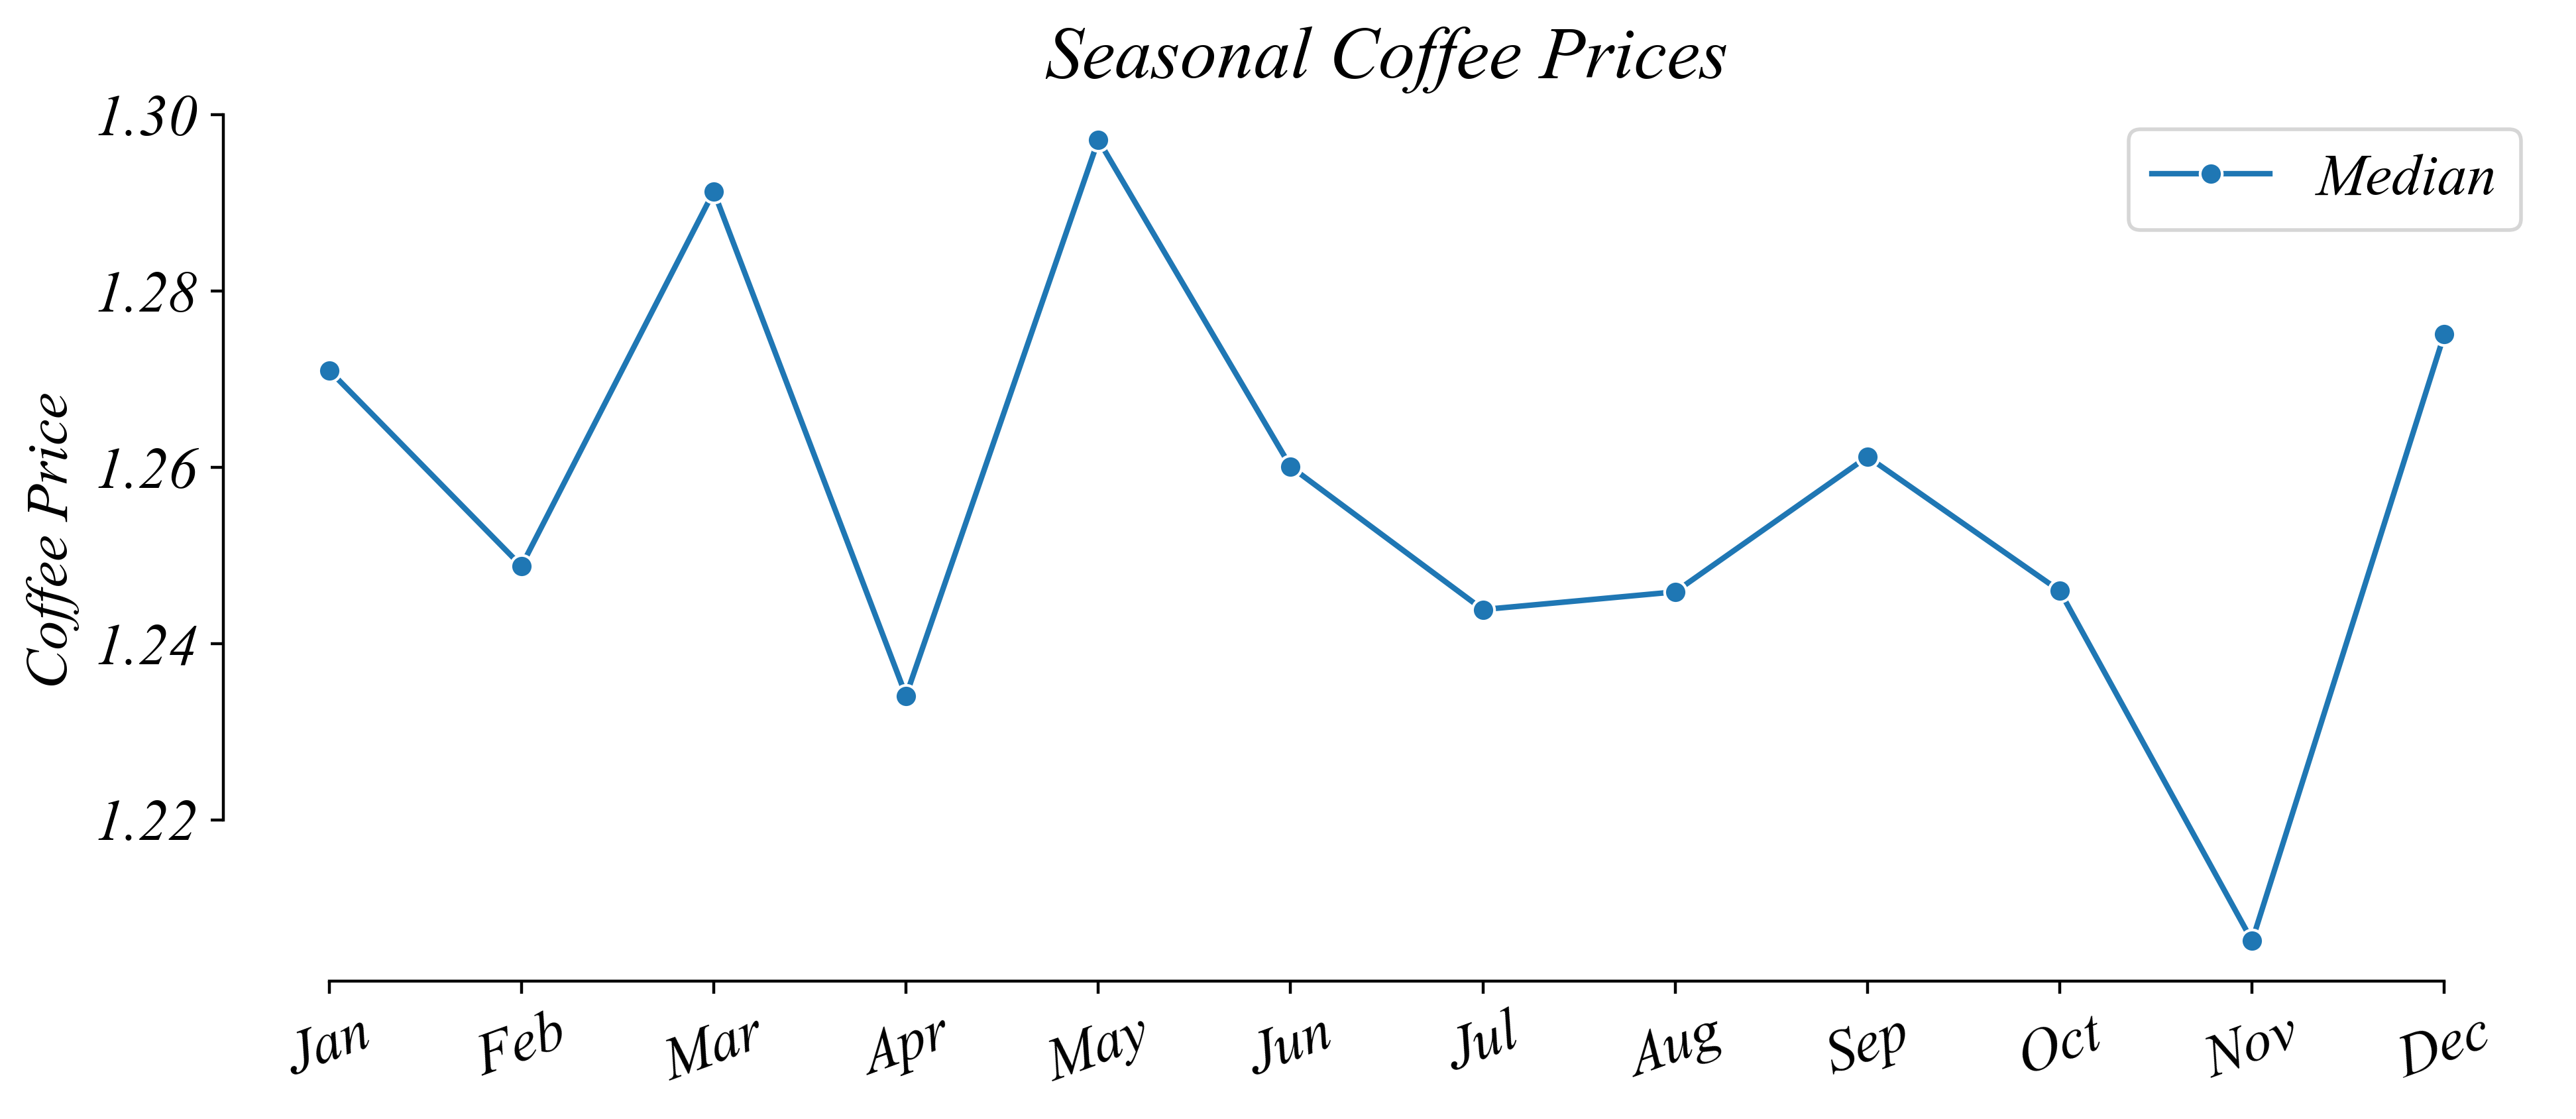

In [28]:
import calendar

# Load Dataset
data = pd.read_csv('data/Monthly_Coffee_Prices.csv', index_col=0)
data['date'] = pd.to_datetime(data['date'], format='%Y-%m')

# Calculate summary statistics
data['month'] = data['date'].dt.month
summary = data.groupby('month')['price'].describe()[['50%']]
summary.columns = ['Median']
summary = summary.reset_index()

# Add month names for x-axis
summary['month_name'] = summary['month'].apply(lambda x: calendar.month_abbr[x])

# Melt the dataframe for seaborn
summary_melted = summary.melt(id_vars=['month', 'month_name'], 
                              var_name='Statistic', 
                              value_name='Price')

# Figure
plt.figure(figsize=(10, 4.5))

# Use seaborn lineplot
sns.lineplot(data=summary_melted, x='month_name', y='Price', 
             hue='Statistic', marker='o', 
             hue_order=['Median'])

# Styling
plt.xlabel('')
plt.ylabel('Coffee Price')
plt.title('Seasonal Coffee Prices')
plt.xticks(rotation=20)
plt.legend(title='')
sns.despine(trim=True)
plt.tight_layout()

# Save Figure
plt.savefig('i/i_14.png')

## Homework

In [29]:
# Create lagged prices for growth rate homework
prices = pd.read_csv('data/Monthly_Coffee_Prices.csv', index_col=0)
prices = prices.rename(columns={'price':'current_price'})
prices['previous_price'] = prices['current_price'].shift()
prices = prices.dropna()
prices.to_csv('data/Monthly_Coffee_Prices_Lag.csv')